# Data Automobie Insurance
    - Tập dữ liệu Automobile Insurance là các thông tin về các đơn yêu cầu bồi thường do một công ty bảo hiểm cung cấp. Từ những thông tin của khách hàng và các số liệu thực tế do hãng bảo hiểm cung cấp, nhóm tiến hành thực hiện đề tài dự đoán xem hồ sơ đó có bị gian lận hay không
    - Dữ liệu bao gồm 41 cột và 1000 dòng. Các thông tin của dataset bao gồm:
    months_as_customer: Số tháng mà người gửi đơn đã làm khách hàng với công ty bảo hiểm.
    age: Tuổi của người được bảo hiểm.
    policy_number: Một số duy nhất xác định chính sách bảo hiểm.
    policy_bind_date: Ngày bắt đầu hợp đồng bảo hiểm.
    policy_state: Bang nơi chính sách bảo hiểm được phát hành.
    policy_csl: Giới hạn Kết hợp Đơn (CSL) chỉ ra số tiền tối đa mà chính sách sẽ trả mỗi sự cố.
    policy_deductible: Số tiền người giữ chính sách phải trả trước khi công ty bảo hiểm chi trả một đơn đăng ký.
    policy_annual_premium: Số tiền phí hàng năm cho chính sách bảo hiểm.
    umrrella_limit: Số tiền bảo hiểm trách nhiệm bổ sung ngoài giới hạn của các chính sách cá nhân.
    insured_zip: Mã ZIP của người được bảo hiểm.
    insured_sex: Giới tính của người được bảo hiểm.
    insured_education_level: Trình độ giáo dục của người được bảo hiểm.
    insured_occupation: Nghề nghiệp của người được bảo hiểm.
    insured_hobbies: Sở thích của người được bảo hiểm.
    insured_relationship: Mối quan hệ của người được bảo hiểm với người giữ chính sách.
    capital-gains: Lợi nhuận vốn được báo cáo của người được bảo hiểm.
    capital-loss: Thiệt hại vốn được báo cáo của người được bảo hiểm.
    incident_date: Ngày của sự cố mà đơn được đề xuất.
    incident_type: Loại sự cố (ví dụ: va chạm, trộm cắp).
    collision_type: Loại va chạm nếu có.
    incident_severity: Mức độ nghiêm trọng của sự cố.
    authorities_contacted: Cơ quan nào đã liên hệ về sự cố.
    incident_state: Bang nơi sự cố xảy ra.
    incident_city: Thành phố nơi sự cố xảy ra.
    incident_location: Địa điểm cụ thể của sự cố.
    incident_hour_of_the_day: Giờ trong ngày khi sự cố xảy ra.
    number_of_vehicles_involved: Số lượng xe tham gia vào sự cố.
    property_damage: Chỉ ra xem có thiệt hại tài sản nào không.
    bodily_injuries: Số vết thương tật do sự cố.
    witnesses: Số lượng nhân chứng cho sự cố.
    police_report_available: Chỉ ra liệu có bản báo cáo của cảnh sát không.
    total_claim_amount: Tổng số tiền đăng ký cho sự cố.
    injury_claim: Số tiền đăng ký cho thương tích cá nhân.
    property_claim: Số tiền đăng ký cho thiệt hại tài sản.
    vehicle_claim: Số tiền đăng ký cho thiệt hại xe hơi.
    auto_make: Hãng sản xuất của xe được bảo hiểm.
    auto_model: Mô hình của xe được bảo hiểm.
    auto_year: Năm sản xuất của xe được bảo hiểm.
    fraud_reported: Chỉ ra liệu đơn đăng ký có được báo cáo là gian lận không.
    _c39: Cột này dường như không đầy đủ hoặc là một giữ chỗ mà không có mô tả rõ ràng.

# 1. Import thư viện

In [1]:
import os, sys
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()
from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import RFE

from numpy import set_printoptions
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB



In [2]:
init_notebook_mode(connected=True)
print(__version__) # requires version >= 1.9.0

5.18.0


In [3]:
data=pd.read_csv('../data/insurance_claims.csv')
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
data.head(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
data.tail(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,1996-11-11,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [6]:
profile = ProfileReport(data, title="Pandas Profiling Report")

profile.to_file("EDA.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Giải thích:
    - Nhóm sử dụng thư viện Pandas-Profiling, là công cụ EDA nhanh chóng, cung cấp những kết luận sơ bộ về bộ dữ liệu để quá trình khám phá dữ liệu cho học máy trở nên dễ dàng hơn. Nhóm xuất ra file EDA.html

In [7]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [9]:
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

### Kết luận:
- Phần lớn dữ liệu không có cột trống. Riêng có cột cuối cùng c_39 tất cả các cột đều bị bỏ trống. Dựa vào tên không có ý nghĩa lẫn khoảng trắng bỏ quá nhiều, Ta kết luận cột c_39 không có tác dụng gì hết nên chúng ta tiến hành bỏ nó

In [10]:
data.drop('_c39',axis=1,inplace =True)

In [11]:
data.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [12]:
object_columns = list(data.select_dtypes(['object']).columns)
len(object_columns)
numeric_columns=list(data.select_dtypes('number'))
len(numeric_columns)
print(f"Bien phan loai: {len(object_columns)}, Bien lien tuc: {len(numeric_columns)}")

Bien phan loai: 21, Bien lien tuc: 18


In [13]:
data.duplicated().sum()

0

In [14]:
object_columns

['policy_bind_date',
 'policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [15]:
data[object_columns].describe()

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,...,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,951,3,3,2,7,14,20,6,60,4,...,4,5,7,7,1000,3,3,14,39,2
top,2006-01-01,OH,250/500,FEMALE,JD,machine-op-inspct,reading,own-child,2015-02-02,Multi-vehicle Collision,...,Minor Damage,Police,NY,Springfield,9935 4th Drive,?,?,Saab,RAM,N
freq,3,352,351,537,161,93,64,183,28,419,...,354,292,262,157,1,360,343,80,43,753


In [16]:
for column in object_columns: 
    print("\033[1m","*, Column: ", column,"\033[0m")   
    print('\t',len(data[column].unique()), "unique values", "\t & \t", 
          data[column].notnull().sum(), "non-null values\t", 
          round(100* data[column].notnull().sum()/len(data[column]),2), 
          "% non-null") 
    if len(data[column].unique())<=10:
            print('\t',data[column].unique())


 *, Column:  policy_bind_date 
	 951 unique values 	 & 	 1000 non-null values	 100.0 % non-null
 *, Column:  policy_state 
	 3 unique values 	 & 	 1000 non-null values	 100.0 % non-null
	 ['OH' 'IN' 'IL']
 *, Column:  policy_csl 
	 3 unique values 	 & 	 1000 non-null values	 100.0 % non-null
	 ['250/500' '100/300' '500/1000']
 *, Column:  insured_sex 
	 2 unique values 	 & 	 1000 non-null values	 100.0 % non-null
	 ['MALE' 'FEMALE']
 *, Column:  insured_education_level 
	 7 unique values 	 & 	 1000 non-null values	 100.0 % non-null
	 ['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
 *, Column:  insured_occupation 
	 14 unique values 	 & 	 1000 non-null values	 100.0 % non-null
 *, Column:  insured_hobbies 
	 20 unique values 	 & 	 1000 non-null values	 100.0 % non-null
 *, Column:  insured_relationship 
	 6 unique values 	 & 	 1000 non-null values	 100.0 % non-null
	 ['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']
 *, Column:  incident_date 
	

### Kết luận:
- Dựa vào thống kê các biến mang tính duy nhất ở các cột phân loại, chúng ta thấy có 2 cột mang tính chất phân loại có tác dụng như mã số, mỗi dòng là một số khác nhau không quá quan trọng trong bộ dữ liệu, chúng ta sẽ tiến hành bỏ nó
- Ngoài ra chúng ta còn thấy có kiểu dữ liệu ngày tháng năm (datetime64ns), không tương thích với các mô hình dự đoán, chúng ta sẽ tiến hành rút trích sang các cột ngày tháng năm và loại bỏ hai cột policy_bind_date và incident_date
- Cuối cùng, một số cột có xuất hiện ký tự đặc biệt là dấu '?'. Có thể là do khi thu thập, những hồ sơ này bị khuyết thiếu nên nhân sự bảo hiểm đã ghi chú lại bằng dấu ? thay cho việc để trống !

In [17]:
nulldata_categorical=(data[object_columns]=='?').sum()
nulldata_categorical

policy_bind_date             0
policy_state                 0
policy_csl                   0
insured_sex                  0
insured_education_level      0
insured_occupation           0
insured_hobbies              0
insured_relationship         0
incident_date                0
incident_type                0
collision_type             178
incident_severity            0
authorities_contacted        0
incident_state               0
incident_city                0
incident_location            0
property_damage            360
police_report_available    343
auto_make                    0
auto_model                   0
fraud_reported               0
dtype: int64

### Giải thích:
Các cột như collision_type (loại hình va chạm), property_damage (thiệt hại tài sản), police_report_available (báo cáo của cảnh sát) không thế nào mang giá trị đặc biệt dấu '?' được. Có thể trong quá trình thu thập dữ liệu xuất hiện lỗi, sơ sót, hoặc điều tra viên, bộ phận thu thập dữ liệu không xác định rõ.
Các thuộc tính trên có thể là một đặc trưng quan trọng trong những mô hình dự đoán liên quan đến mức độ thiệt hại hoặc hồ sơ thật giả của công ty bảo hiểm, cần lưu ý để tránh đưa ra sai sót trong quá trình phân tích dữ liệu

In [18]:
for column in object_columns:
    if len(data[column].unique())<=10:
        print('-'*100)
        print("*, Column: ", column)
        print(data[column].value_counts())
        print('-'*100)
    

----------------------------------------------------------------------------------------------------
*, Column:  policy_state
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
*, Column:  policy_csl
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
*, Column:  insured_sex
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
*, Column:  insured

In [19]:
for column in object_columns:
    if len(data[column].unique())<=40:
        data[column].value_counts().iplot(kind='bar',title=column, 
                                        xTitle=column, 
                                        yTitle='Values')


In [20]:
numeric_columns

['months_as_customer',
 'age',
 'policy_number',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year']

In [21]:
data[numeric_columns].describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [22]:
for column in numeric_columns: 
    print("*, Column: ", column)   
    print(len(data[column].unique()), "unique values", "\t & \t", 
          data[column].notnull().sum(), "non-null values\t", 
          round(100* data[column].notnull().sum()/len(data[column]),2), 
          "% non-null")
    if len(data[column].unique())<=10:
        print(data[column].unique())
    

*, Column:  months_as_customer
391 unique values 	 & 	 1000 non-null values	 100.0 % non-null
*, Column:  age
46 unique values 	 & 	 1000 non-null values	 100.0 % non-null
*, Column:  policy_number
1000 unique values 	 & 	 1000 non-null values	 100.0 % non-null
*, Column:  policy_deductable
3 unique values 	 & 	 1000 non-null values	 100.0 % non-null
[1000 2000  500]
*, Column:  policy_annual_premium
991 unique values 	 & 	 1000 non-null values	 100.0 % non-null
*, Column:  umbrella_limit
11 unique values 	 & 	 1000 non-null values	 100.0 % non-null
*, Column:  insured_zip
995 unique values 	 & 	 1000 non-null values	 100.0 % non-null
*, Column:  capital-gains
338 unique values 	 & 	 1000 non-null values	 100.0 % non-null
*, Column:  capital-loss
354 unique values 	 & 	 1000 non-null values	 100.0 % non-null
*, Column:  incident_hour_of_the_day
24 unique values 	 & 	 1000 non-null values	 100.0 % non-null
*, Column:  number_of_vehicles_involved
4 unique values 	 & 	 1000 non-null value

### Kết luận:
- Dù là kiểu dữ liệu số, nhưng một số cột thuộc kiểu dữ liệu rời rạc chứ không phải kiểu dữ liệu liên tục ( ví dụ như là witnesses,...) mang vai trò như một phân lớp. Chúng ta sẽ chuyển kiểu dữ liệu các cột này sang kiểu dữ liệu mang tính phân loại để tăng hiệu suất dự án !
- Các biến rời rạc nhưng chiếm khá nhiều giá trị như tuổi, để mô hình học máy học tốt hơn, nhóm cũng dự định chuyển sang thành cột phân loại với Young, Middle và Old.

In [23]:
change_tocategory=[i for i in numeric_columns if len(data[i].unique())<=46]
change_tocategory

['age',
 'policy_deductable',
 'umbrella_limit',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'auto_year']

In [24]:
data[change_tocategory]=data[change_tocategory].astype('object')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   object 
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   object 
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   object 
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [25]:
numeric_columns=list(data.select_dtypes('number'))
numeric_columns

['months_as_customer',
 'policy_number',
 'policy_annual_premium',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim']

In [26]:
for c in numeric_columns:
    data[c].iplot(kind='hist',title=c,xTitle=c)
    plt.show()

In [27]:
nulldata_numeric=(data[numeric_columns]==0).sum()
nulldata_numeric

months_as_customer         1
policy_number              0
policy_annual_premium      0
insured_zip                0
capital-gains            508
capital-loss             475
total_claim_amount         0
injury_claim              25
property_claim            19
vehicle_claim              0
dtype: int64

months_as_customer


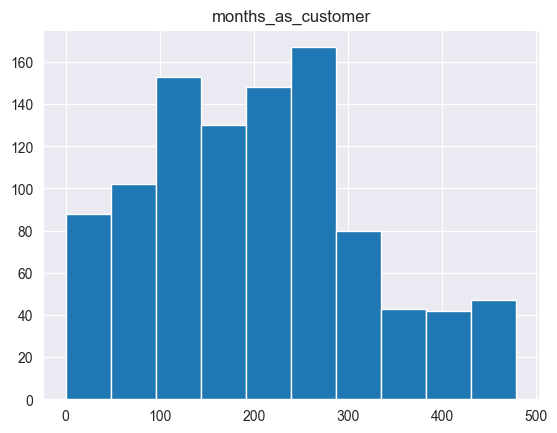

policy_number


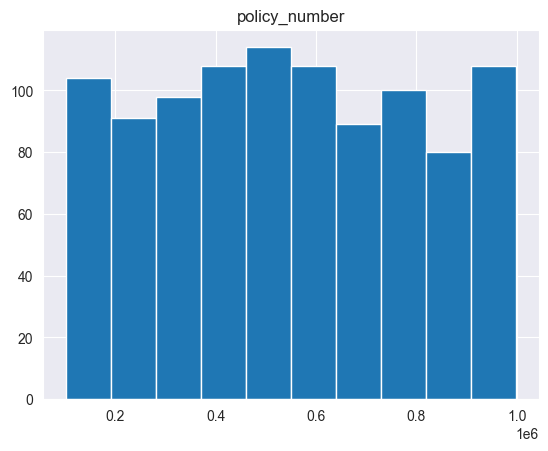

policy_annual_premium


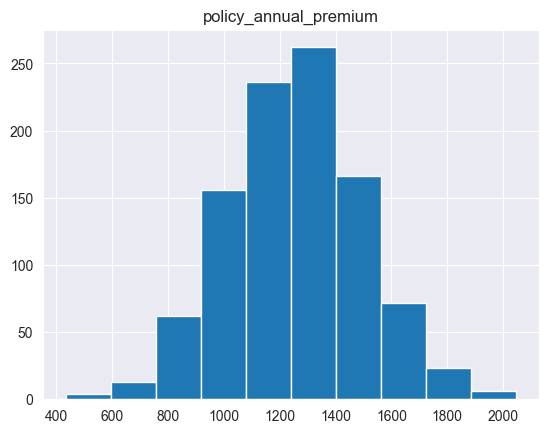

insured_zip


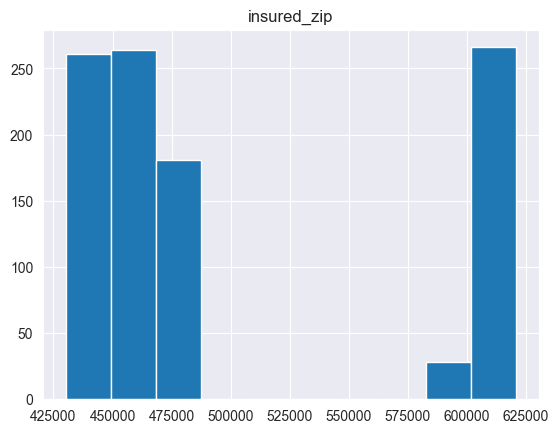

capital-gains


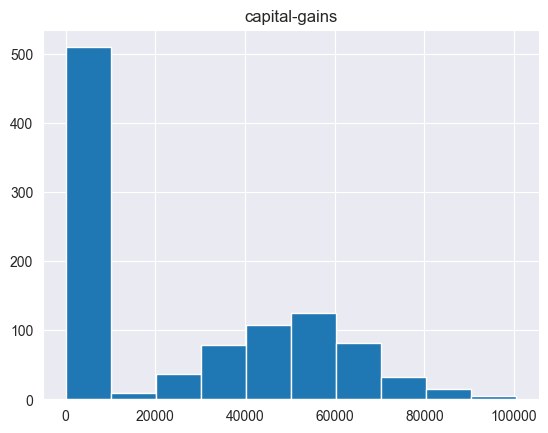

capital-loss


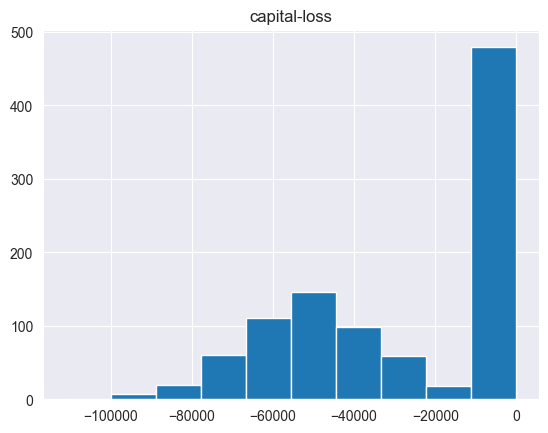

total_claim_amount


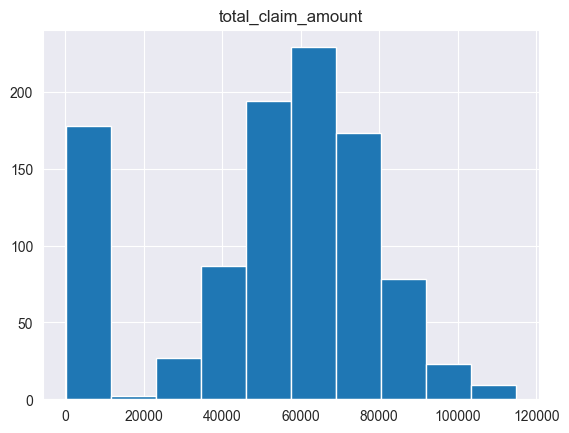

injury_claim


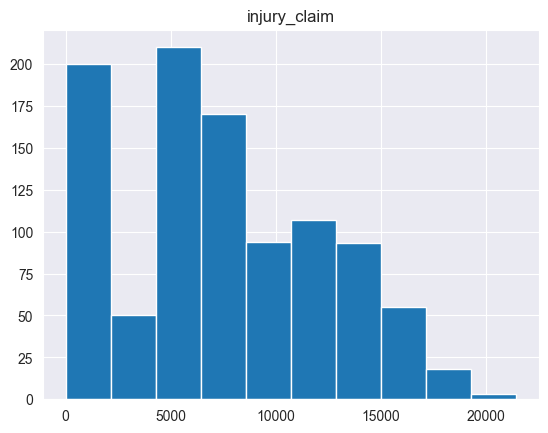

property_claim


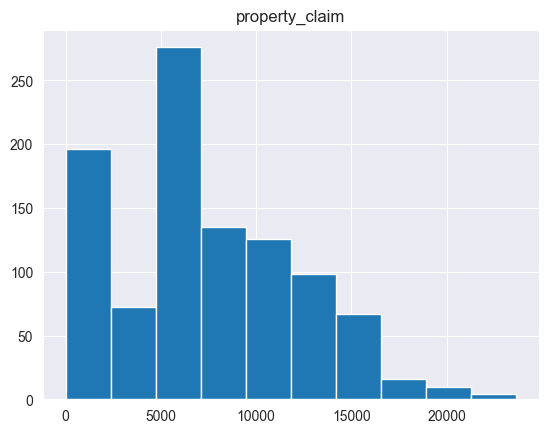

vehicle_claim


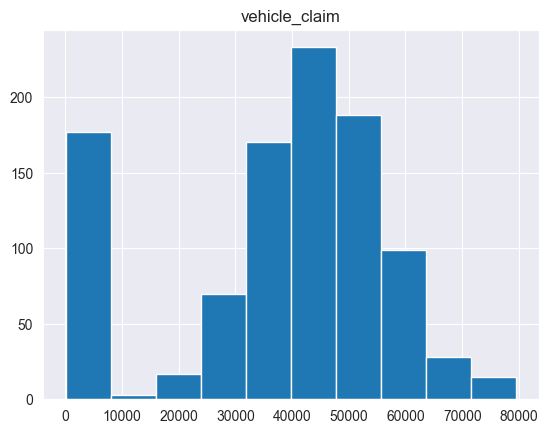

In [28]:
for c in numeric_columns:
    print(c)
    data.hist(c)
    plt.show()

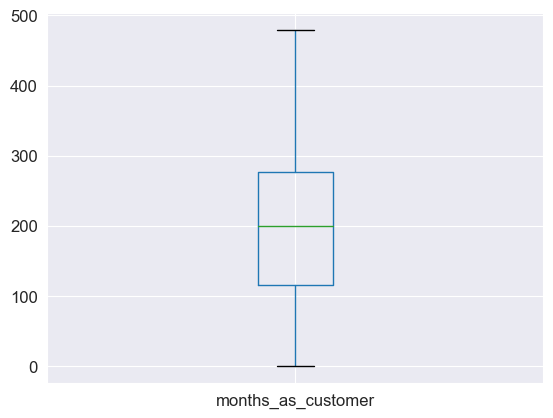

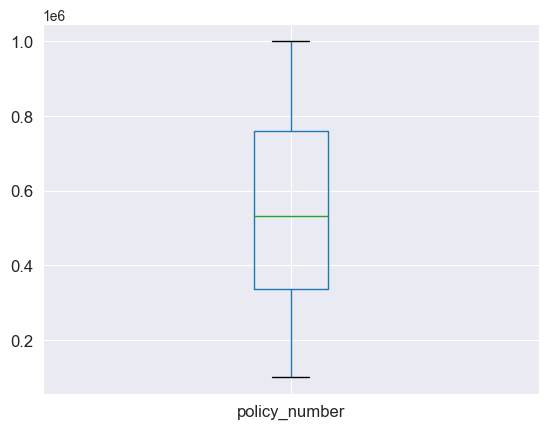

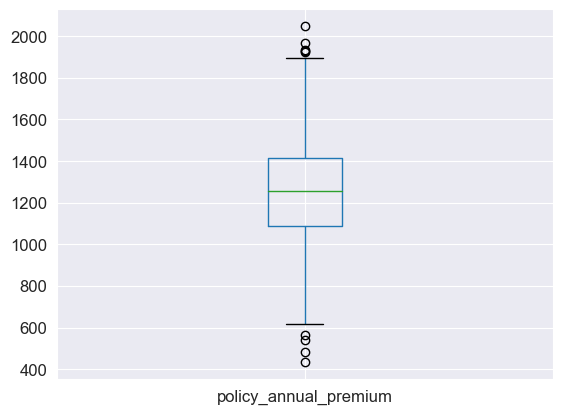

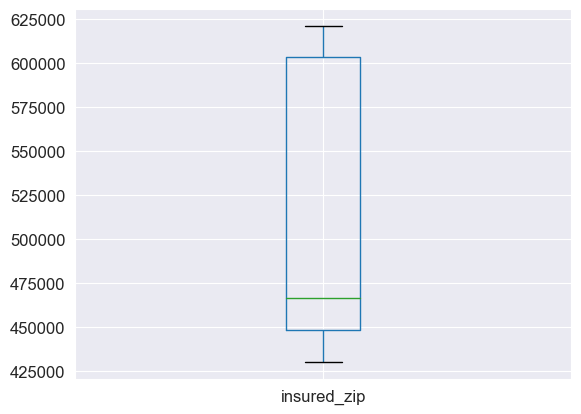

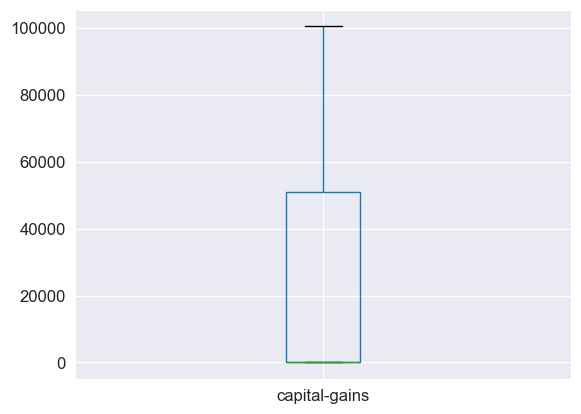

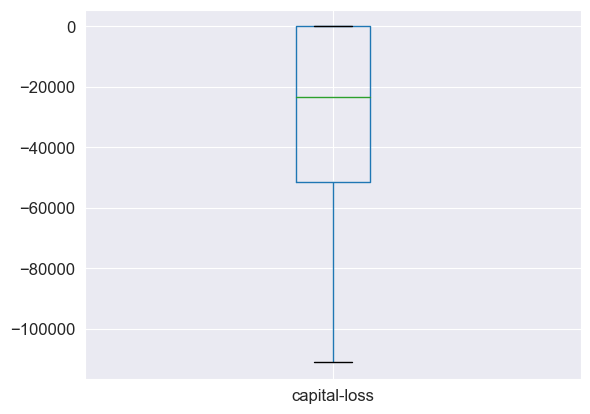

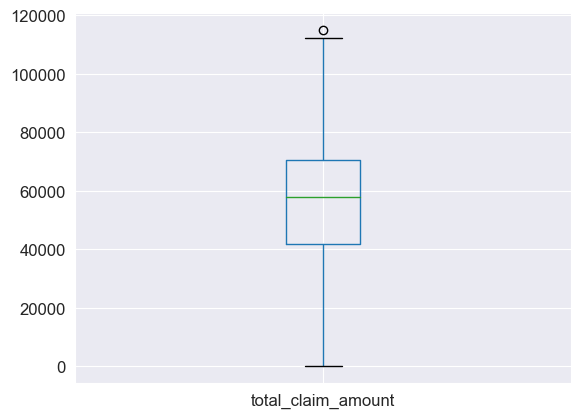

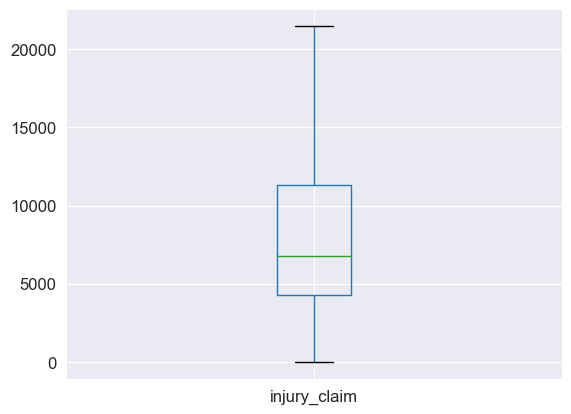

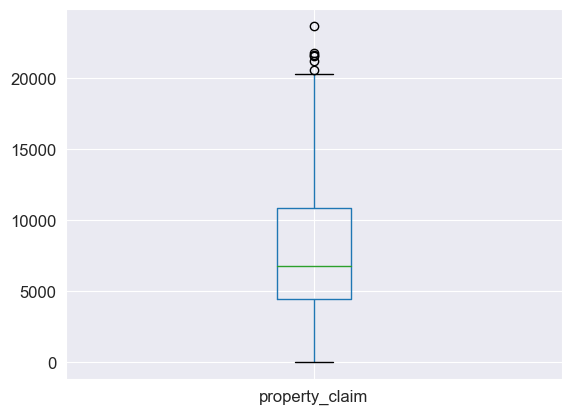

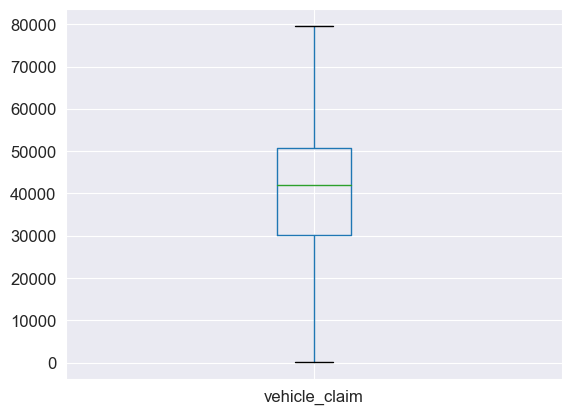

In [29]:
numeric_columns=data.select_dtypes(['number']).columns
for c in numeric_columns:
    plt.figure()
    data.boxplot(c, rot=0, grid=True, fontsize=12);
    plt.show()

In [30]:
def check_outliers(name,outliers_list):
    we=data[name].values
    Q1=np.quantile(we,0.25)
    Q3=np.quantile(we,0.75)
    IQR=Q3-Q1
    print("Q1: ",Q1,"Q3: ",Q3,"IQR:",IQR)
    outliers=np.unique(we[[(n<Q1-1.5*IQR)|(n>Q3+1.5*IQR) for n in we]])
    indexes=[we.tolist().index(i) for i in outliers]
    if len(indexes)>0:
        outliers_list.append(name)
    print("Indexes of outliers: ", indexes)
    print("Number of outliers: ", len(indexes))
    print("Outlier values", we[indexes])
    print("-----")

In [31]:
outliers_list=[]
for col in numeric_columns:
    check_outliers(col,outliers_list)
print(outliers_list)

Q1:  115.75 Q3:  276.25 IQR: 160.5
Indexes of outliers:  []
Number of outliers:  0
Outlier values []
-----
Q1:  335980.25 Q3:  759099.75 IQR: 423119.5
Indexes of outliers:  []
Number of outliers:  0
Outlier values []
-----
Q1:  1089.6075 Q3:  1415.6950000000002 IQR: 326.0875000000001
Indexes of outliers:  [248, 763, 43, 681, 133, 544, 796, 747, 229]
Number of outliers:  9
Outlier values [ 433.33  484.67  538.17  566.11 1922.84 1927.87 1935.85 1969.63 2047.59]
-----
Q1:  448404.5 Q3:  603251.0 IQR: 154846.5
Indexes of outliers:  []
Number of outliers:  0
Outlier values []
-----
Q1:  0.0 Q3:  51025.0 IQR: 51025.0
Indexes of outliers:  []
Number of outliers:  0
Outlier values []
-----
Q1:  -51500.0 Q3:  0.0 IQR: 51500.0
Indexes of outliers:  []
Number of outliers:  0
Outlier values []
-----
Q1:  41812.5 Q3:  70592.5 IQR: 28780.0
Indexes of outliers:  [11]
Number of outliers:  1
Outlier values [114920]
-----
Q1:  4295.0 Q3:  11305.0 IQR: 7010.0
Indexes of outliers:  []
Number of outliers: 

### Kết luận:
- Các cột không chứa quá nhiều giá trị ngoại lệ. Ở bước tiền xử lý dữ liệu, chúng ta có thể xóa ngoại lệ để sử dụng MinMaxScaler để tiến hành chuẩn hóa dữ liệu số ( vì nhạy cảm với giá trị ngoại lệ)

In [32]:
corrle=data[numeric_columns].corr()
corrle

,months_as_customer,policy_number,policy_annual_premium,insured_zip,capital-gains,capital-loss,total_claim_amount,injury_claim,property_claim,vehicle_claim
months_as_customer,1.000000,0.057555,0.005018,0.017895,0.006399,0.020209,0.062108,0.065329,0.034940,0.061013
policy_number,0.057555,1.000000,0.022566,0.007083,0.009802,-0.005669,-0.018009,-0.008762,-0.010678,-0.020184
policy_annual_premium,0.005018,0.022566,1.000000,0.032354,-0.013738,0.023547,0.009094,-0.017633,-0.011654,0.020246
insured_zip,0.017895,0.007083,0.032354,1.000000,0.006303,0.049372,-0.033873,-0.017495,-0.006841,-0.041083
capital-gains,0.006399,0.009802,-0.013738,0.006303,1.000000,-0.046904,0.015980,0.025934,-0.000779,0.015836
capital-loss,0.020209,-0.005669,0.023547,0.049372,-0.046904,1.000000,-0.036060,-0.046060,-0.022863,-0.032665
total_claim_amount,0.062108,-0.018009,0.009094,-0.033873,0.015980,-0.036060,1.000000,0.805025,0.810686,0.982773
injury_claim,0.065329,-0.008762,-0.017633,-0.017495,0.025934,-0.046060,0.805025,1.000000,0.563866,0.722878
property_claim,0.034940,-0.010678,-0.011654,-0.006841,-0.000779,-0.022863,0.810686,0.563866,1.000000,0.732090
vehicle_claim,0.061013,-0.020184,0.020246,-0.041083,0.015836,-0.032665,0.982773,0.722878,0.732090,1.000000


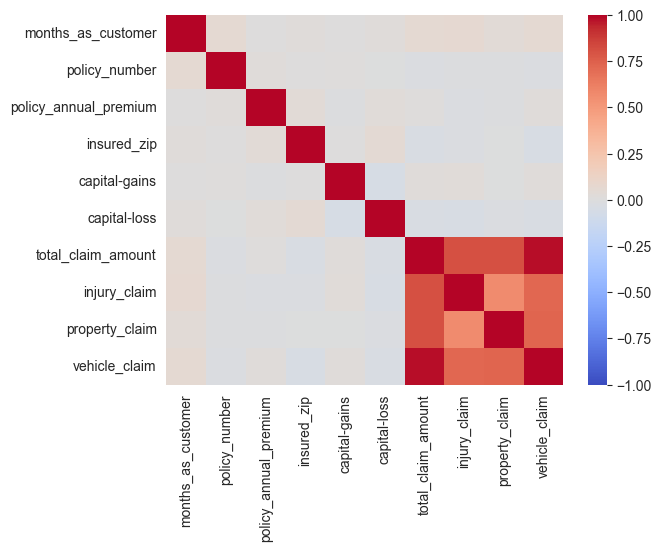

In [33]:
sns.heatmap(corrle,vmin=-1,vmax=1, annot=False, fmt=".2f",cmap='coolwarm')
plt.show()

### Kết luận:
- Các biến liên tục phần lớn không có sự tương quan nào hết.
- Ta nhận thấy các giá trị như total_claim_amount, vehicle_claim, injury_claim, property_claim có sự tương quan thuận mạnh mẽ.Bởi vì total_claim_amount là tổng ba giá trị còn lại
- incident_hour_of_the_day có mối quan hệ thuận với các bốn cột trên, chúng ta lưu ý để tiến hành phân tích xử lý dữ liệu

In [34]:
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


## Chỉnh sửa dữ liệu
- Sau những phân tích trên, chúng ta sẽ tiến hành chỉnh sửa data theo kết luận trước đó

In [35]:
data['incident_date']=pd.to_datetime(data['incident_date'])
data['day']=data['incident_date'].dt.day
data['month']=data['incident_date'].dt.month
data['year']=data['incident_date'].dt.year
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,day,month,year
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,6510,13020,52080,Saab,92x,2004,Y,25,1,2015
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,780,780,3510,Mercedes,E400,2007,Y,21,1,2015
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,7700,3850,23100,Dodge,RAM,2007,N,22,2,2015
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,10,1,2015
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1300,650,4550,Accura,RSX,2009,N,17,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,17440,8720,61040,Honda,Accord,2006,N,22,2,2015
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,18080,18080,72320,Volkswagen,Passat,2015,N,24,1,2015
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,7500,7500,52500,Suburu,Impreza,1996,N,23,1,2015
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,5220,5220,36540,Audi,A5,1998,N,26,2,2015


In [36]:
data.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)
object_columns = list(data.select_dtypes(['object']).columns)

In [37]:
data.drop(['policy_number','insured_zip'],axis=1,inplace=True)

In [38]:
bins=[19,30,50,64]
labels=['Young','Middle','Old']
data['age']=pd.cut(data.age,bins=bins,labels=labels,right=False)
data

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,day,month,year
0,328,Middle,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,6510,13020,52080,Saab,92x,2004,Y,25,1,2015
1,228,Middle,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,780,780,3510,Mercedes,E400,2007,Y,21,1,2015
2,134,Young,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,7700,3850,23100,Dodge,RAM,2007,N,22,2,2015
3,256,Middle,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,10,1,2015
4,228,Middle,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,1300,650,4550,Accura,RSX,2009,N,17,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,Middle,OH,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,...,17440,8720,61040,Honda,Accord,2006,N,22,2,2015
996,285,Middle,IL,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,...,18080,18080,72320,Volkswagen,Passat,2015,N,24,1,2015
997,130,Middle,OH,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,...,7500,7500,52500,Suburu,Impreza,1996,N,23,1,2015
998,458,Old,IL,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,...,5220,5220,36540,Audi,A5,1998,N,26,2,2015


In [39]:
bins=[0,9,17,23]
labels=['Morning','Evening','Night']
data['incident_hour_of_the_day']=pd.cut(data.incident_hour_of_the_day,bins=bins,labels=labels,right=True)
data

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,day,month,year
0,328,Middle,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,6510,13020,52080,Saab,92x,2004,Y,25,1,2015
1,228,Middle,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,780,780,3510,Mercedes,E400,2007,Y,21,1,2015
2,134,Young,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,7700,3850,23100,Dodge,RAM,2007,N,22,2,2015
3,256,Middle,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,10,1,2015
4,228,Middle,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,1300,650,4550,Accura,RSX,2009,N,17,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,Middle,OH,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,...,17440,8720,61040,Honda,Accord,2006,N,22,2,2015
996,285,Middle,IL,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,...,18080,18080,72320,Volkswagen,Passat,2015,N,24,1,2015
997,130,Middle,OH,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,...,7500,7500,52500,Suburu,Impreza,1996,N,23,1,2015
998,458,Old,IL,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,...,5220,5220,36540,Audi,A5,1998,N,26,2,2015


In [40]:
bins=[0,2,120,497]
labels=['None','N','Y']
data['months_as_customer']=pd.cut(data.months_as_customer,bins=bins,labels=labels,right=False)
data

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,day,month,year
0,Y,Middle,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,6510,13020,52080,Saab,92x,2004,Y,25,1,2015
1,Y,Middle,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,780,780,3510,Mercedes,E400,2007,Y,21,1,2015
2,Y,Young,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,7700,3850,23100,Dodge,RAM,2007,N,22,2,2015
3,Y,Middle,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,10,1,2015
4,Y,Middle,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,1300,650,4550,Accura,RSX,2009,N,17,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,N,Middle,OH,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,...,17440,8720,61040,Honda,Accord,2006,N,22,2,2015
996,Y,Middle,IL,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,...,18080,18080,72320,Volkswagen,Passat,2015,N,24,1,2015
997,Y,Middle,OH,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,...,7500,7500,52500,Suburu,Impreza,1996,N,23,1,2015
998,Y,Old,IL,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,...,5220,5220,36540,Audi,A5,1998,N,26,2,2015


In [41]:
data.fraud_reported.value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

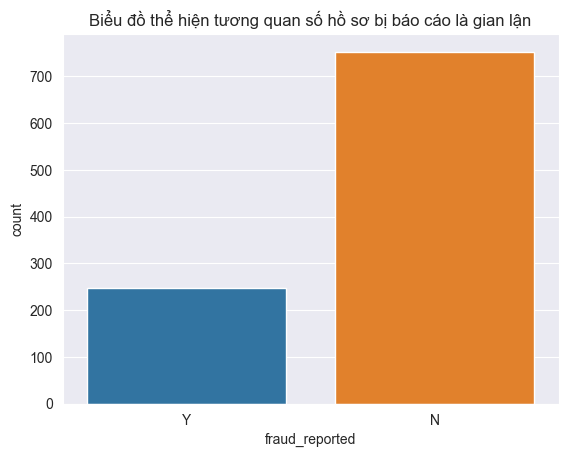

In [42]:
sns.countplot(x='fraud_reported',data=data)
plt.title("Biểu đồ thể hiện tương quan số hồ sơ bị báo cáo là gian lận")
plt.show()

### Kết luận:
- Tỉ lệ số hồ sơ được cho là gian lận quá lớn, gấp 3 lần số bộ hồ sơ được chấp thuận. Đây có thể ảnh hưởng rất lớn tới mô hỉnh dự đoán khi biến mục tiêu xuất hiện tình trạng mất cân bằng (imbalanced variable)

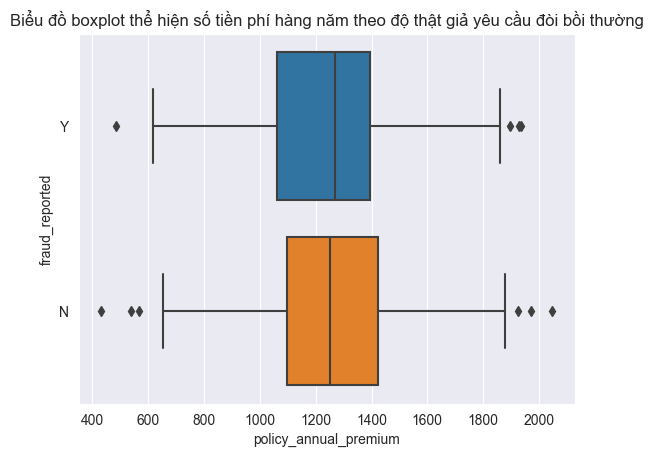

In [43]:
sns.boxplot(data=data, x="policy_annual_premium", y="fraud_reported")
plt.title('Biểu đồ boxplot thể hiện số tiền phí hàng năm theo độ thật giả yêu cầu đòi bồi thường')
plt.show()

### Kết luận:
- Có sự tương quan giữa policy_annual_prenium, các hồ sơ bị xác định gian lận có nhiều giá trị ngoại lệ về khoản tiền p đóng lệch xa khỏi hai khoảng râu của đồ thị. Hơn hết 50% các hồ sơ được xác định gian lận nằm ở (11000,14300) và 50% bộ hồ sơ được chấp thuận thì nằm trong khoảng (10400,14000)
- Sự tương quan không được hiển thị rõ rệt vì độ chênh lệch giữa hai loại hồ sơ là quá lớn
- Như vậy, ta có thể cân nhắc policy_annual_prenium là biến thích hợp đưa vào dự đoán


In [44]:
data.shape

(1000, 38)

In [45]:
data.age.value_counts()

Middle    718
Young     155
Old       125
Name: age, dtype: int64

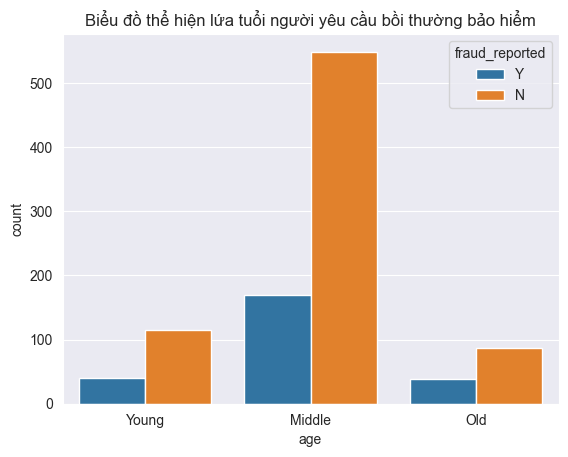

In [46]:
sns.countplot(x='age',hue='fraud_reported', data=data)
plt.title("Biểu đồ thể hiện lứa tuổi người yêu cầu bồi thường bảo hiểm")
plt.show()

In [47]:
data.insured_education_level.value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

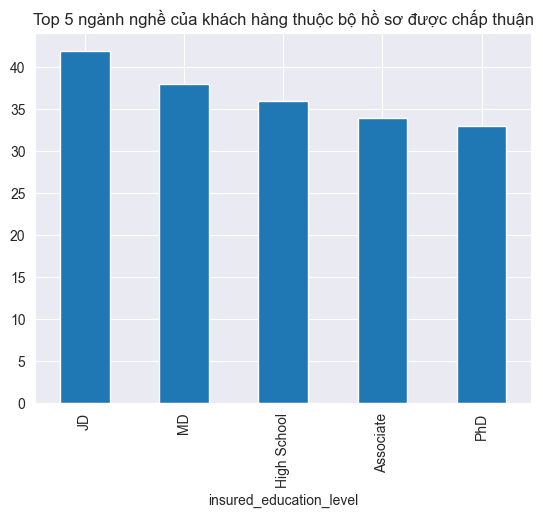

In [48]:
occupation_Y=data[data.fraud_reported=='Y'].groupby('insured_education_level')['fraud_reported'].count().sort_values(ascending=False)
occupation_Y.head(5).plot.bar()
plt.title("Top 5 ngành nghề của khách hàng thuộc bộ hồ sơ được chấp thuận")
plt.show()

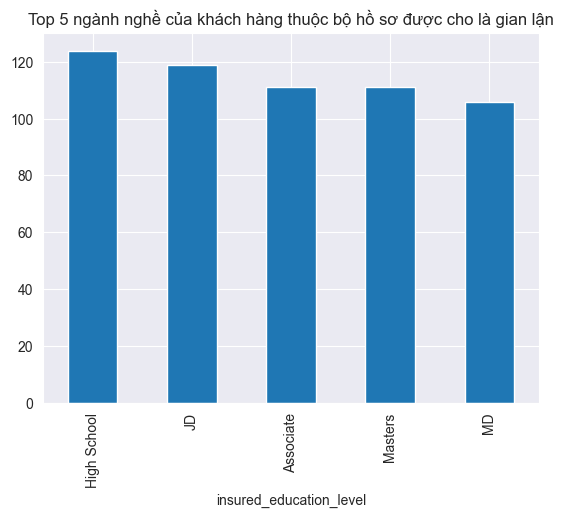

In [49]:
occupation_N=data[data.fraud_reported=='N'].groupby('insured_education_level')['fraud_reported'].count().sort_values(ascending=False)
occupation_N.head(5).plot.bar()
plt.title("Top 5 ngành nghề của khách hàng thuộc bộ hồ sơ được cho là gian lận")
plt.show()

### Kết luận:
- Có thể thấy rõ có sự khác nhau về nghề nghiệp của khách hàng giữa bộ hồ sơ gian lận với được chấp thuận. 
- Chúng ta có thể cân nhắc đây có thể là một đặc trưng đưa vào mô hình dự đoán!

In [50]:
available_request=data[data['fraud_reported']=='Y']

In [51]:
data.insured_sex.value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

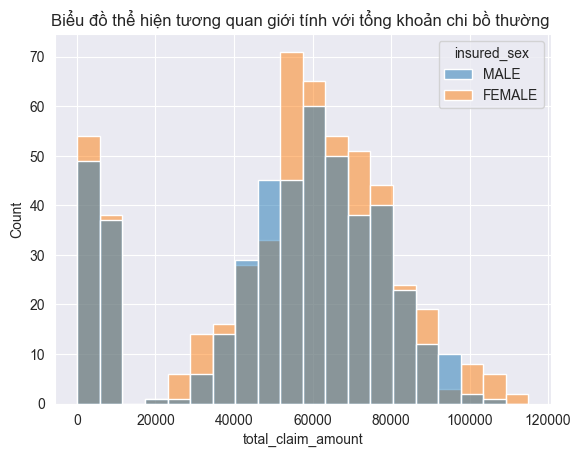

In [52]:
sns.histplot(data=data, x='total_claim_amount', hue='insured_sex'); # histogram và phân loại
plt.title("Biểu đồ thể hiện tương quan giới tính với tổng khoản chi bồ thường ")
plt.show()

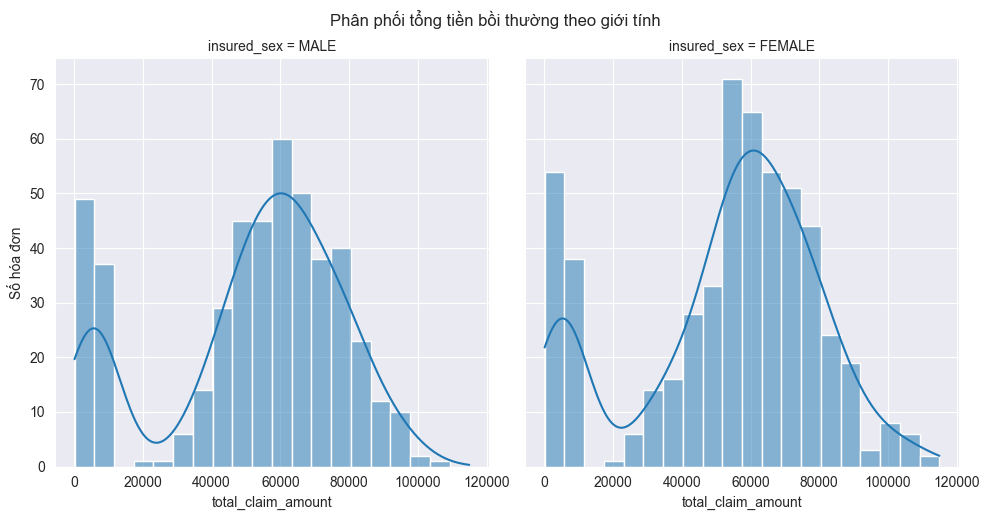

In [53]:
g = sns.displot(data, x = 'total_claim_amount', col= 'insured_sex', kde = True) # chỉ vẽ kde: kind = 'kde'
plt.suptitle('Phân phối tổng tiền bồi thường theo giới tính', y = 1.03)
g.set_ylabels('Số hóa đơn')
plt.show()

In [54]:
data.fraud_reported.value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

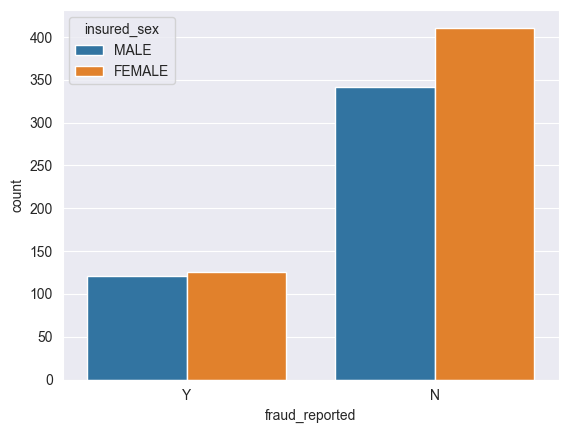

In [55]:
sns.countplot(x='fraud_reported',hue='insured_sex', data=data);


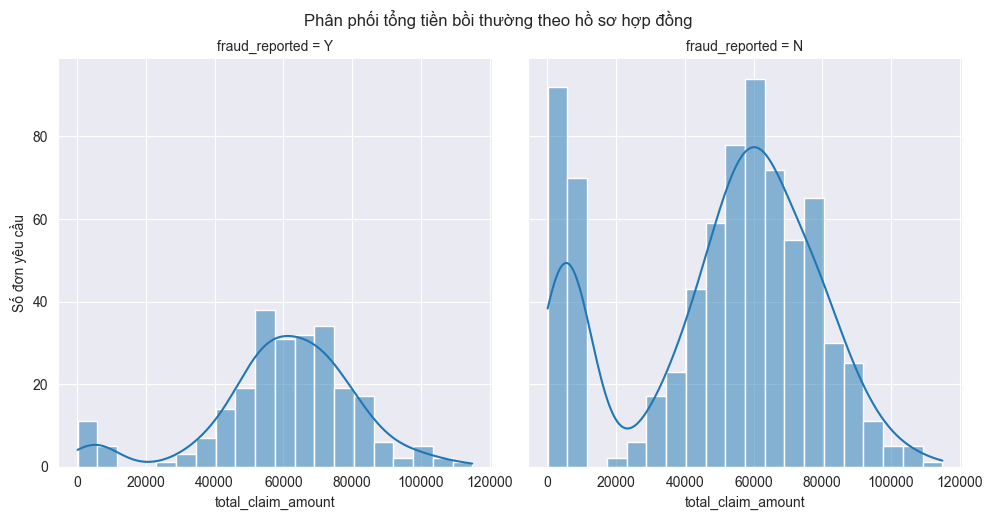

In [56]:
g = sns.displot(data, x = 'total_claim_amount', col= 'fraud_reported', kde = True) # chỉ vẽ kde: kind = 'kde'
plt.suptitle('Phân phối tổng tiền bồi thường theo hồ sơ hợp đồng', y = 1.03)
g.set_ylabels('Số đơn yêu cầu')
plt.show()

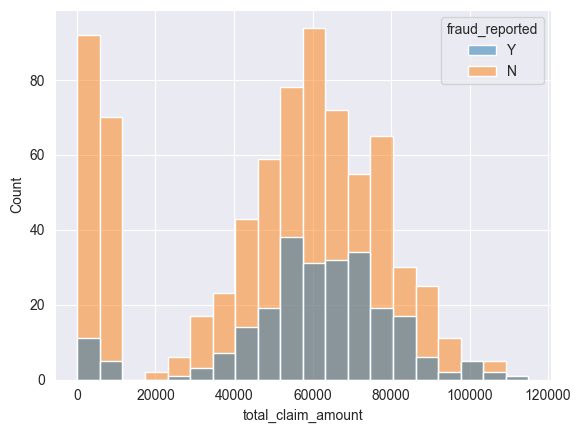

In [57]:
sns.histplot(data=data, x='total_claim_amount', hue='fraud_reported'); # histogram và phân loại

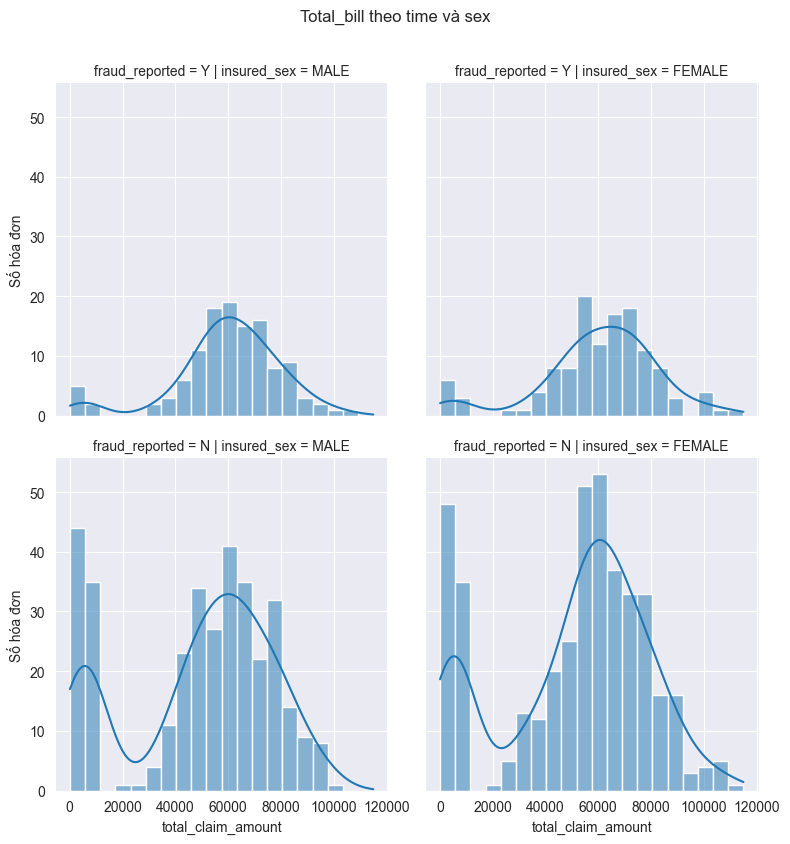

In [58]:
g = sns.displot(data, x = 'total_claim_amount', col= 'insured_sex', row = 'fraud_reported', height=4,kde=True)
plt.suptitle('Total_bill theo time và sex', y = 1.05)
g.set_ylabels('Số hóa đơn')
plt.show()

### Kết luận:
- Có thể thấy rõ biến giới tính không ảnh hưởng đến độ gian lận của bộ dữ liệu
- Tổng số tiền bồi thường cũng không ảnh hưởng đến độ gian lận vì hình dáng của đường phân phối của hai biểu đồ trên tương đối giống nhau, có sự khác biệt lớn về ngoại quan là do tỉ lệ hai bộ hồ sơ được coi là gian lận và chấp thuận chênh lệch nhau quá nhiều

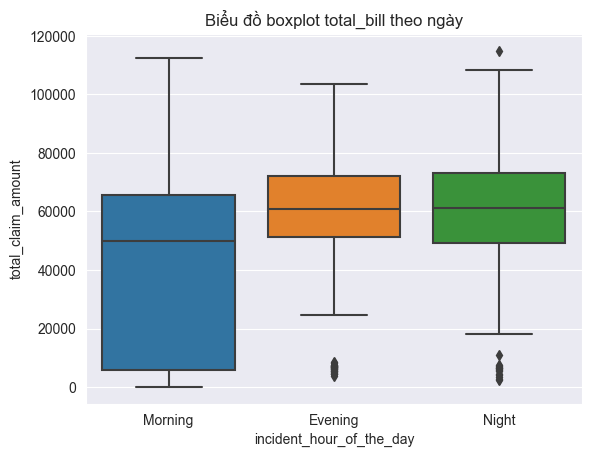

In [59]:
sns.boxplot(data=data, x="incident_hour_of_the_day", y="total_claim_amount")
plt.title('Biểu đồ boxplot total_bill theo ngày')
plt.show()

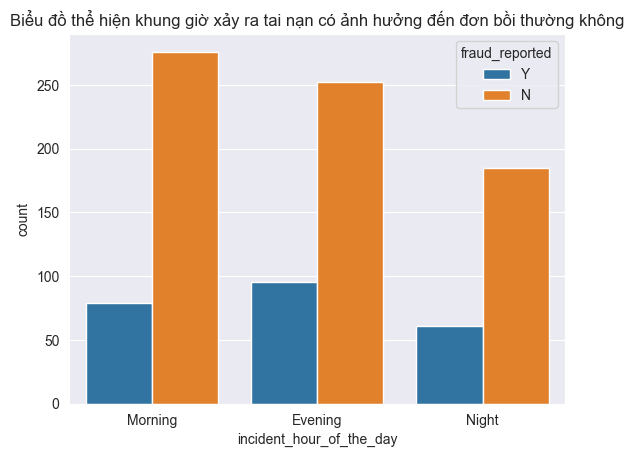

In [60]:
sns.countplot(x='incident_hour_of_the_day',hue='fraud_reported',data=data)
plt.title('Biểu đồ thể hiện khung giờ xảy ra tai nạn có ảnh hưởng đến đơn bồi thường không')
plt.show()

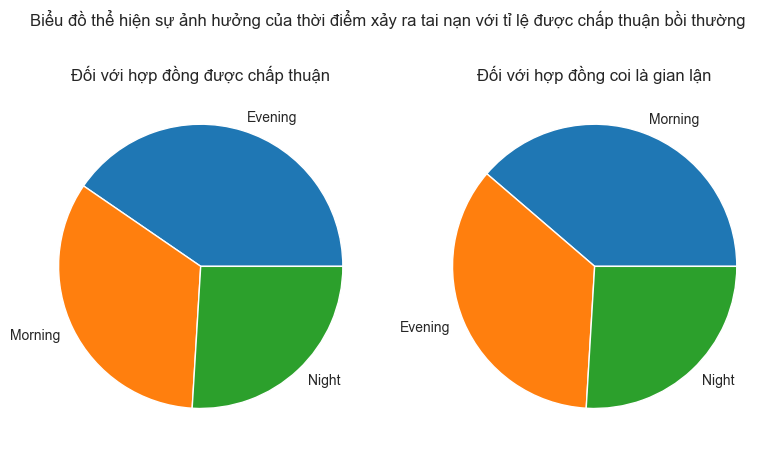

In [61]:
plt.figure(figsize=(8,5))
# Vẽ biểu đồ ở hàng 0
plt.subplot(1,2,1)
data_Y=data[data['fraud_reported']=='Y']
Y_contract=data_Y['incident_hour_of_the_day'].value_counts()
Y_contract.plot(kind='pie')
plt.ylabel('')  # Ẩn tiêu đề trục y cho subplot 1
plt.title("Đối với hợp đồng được chấp thuận")

plt.subplot(1,2,2)
data_N=data[data['fraud_reported']=='N']
N_contract=data_N['incident_hour_of_the_day'].value_counts()
N_contract.plot(kind='pie')
plt.ylabel('')  # Ẩn tiêu đề trục y cho subplot 1
plt.title("Đối với hợp đồng coi là gian lận")



# Tùy chỉnh tiêu đề
plt.suptitle("Biểu đồ thể hiện sự ảnh hưởng của thời điểm xảy ra tai nạn với tỉ lệ được chấp thuận bồi thường")

plt.tight_layout()
# Hiển thị figure
plt.show()

### Kết luận:
- Ở khung giờ sáng từ 3h đến 9h sáng có độ biến động dữ liệu cao khoảng tiền bồi thường có thể dao động từ con số nhỏ đến tận 60000 (đơn vị tiền tệ). Có thể do sáng sớm đoạn đường vắng mọi người có xu hướng chạy ẩu hoặc kẹt xe dễ xảy ra va chạm nên bộ dữ liệu biến động nhiều như vậy
- Như vậy, incident_hour_of_day có sự tương quan đến việc hợp đồng có bị coi là gian lận hay ko, nhóm có thể cân nhắc thêm vào đặc trưng


In [62]:
check_claim=data[['injury_claim','property_claim','vehicle_claim']].sum()
check_claim

injury_claim       7433420
property_claim     7399570
vehicle_claim     37928950
dtype: int64

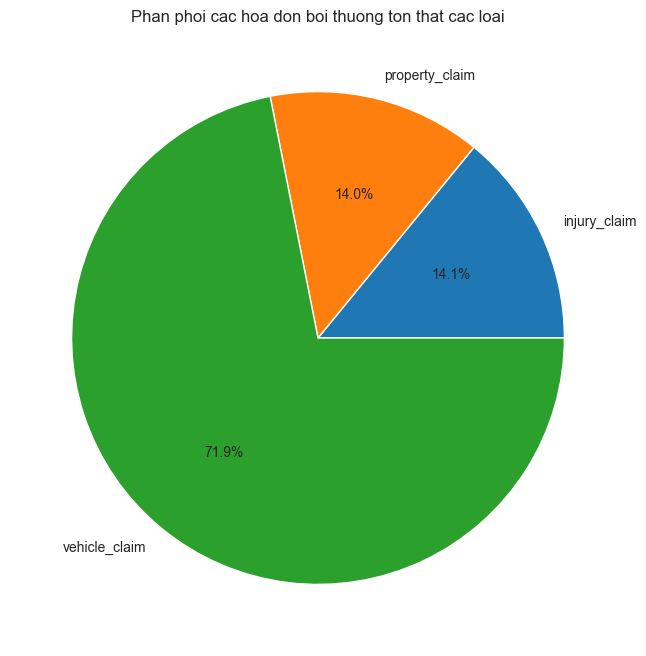

In [63]:
plt.figure(figsize = (10,8))
plt.title('Phan phoi cac hoa don boi thuong ton that cac loai')
plt.pie(check_claim, labels = check_claim.index, autopct = '%1.1f%%', startangle=0)
plt.show()

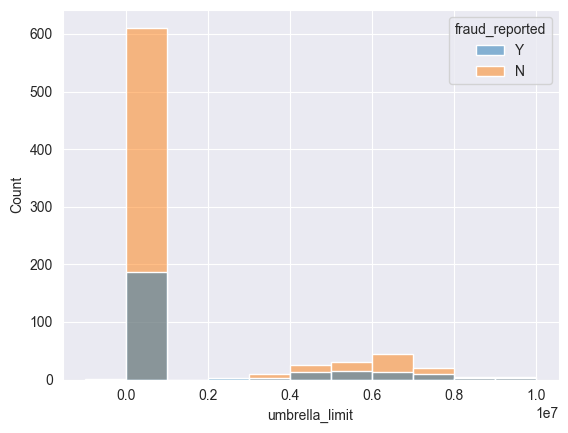

In [64]:
sns.histplot(data=data, x='umbrella_limit', hue='fraud_reported'); # histogram và phân loại

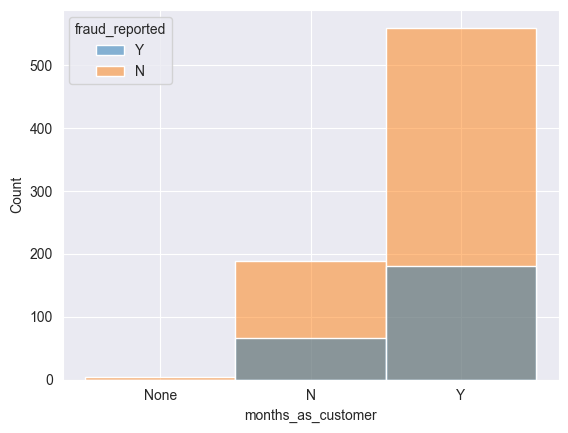

In [65]:
sns.histplot(data=data, x='months_as_customer', hue='fraud_reported'); # histogram và phân loại

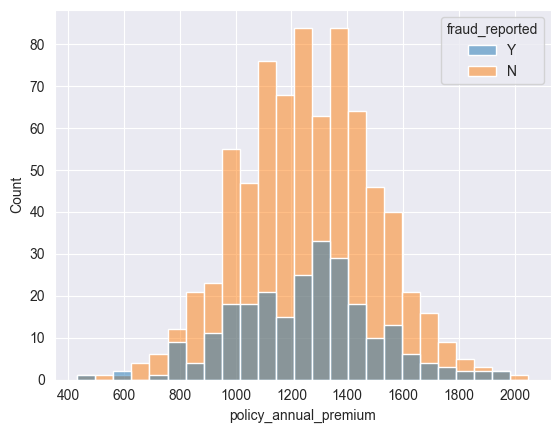

In [66]:
sns.histplot(data=data, x='policy_annual_premium', hue='fraud_reported'); # histogram và phân loại

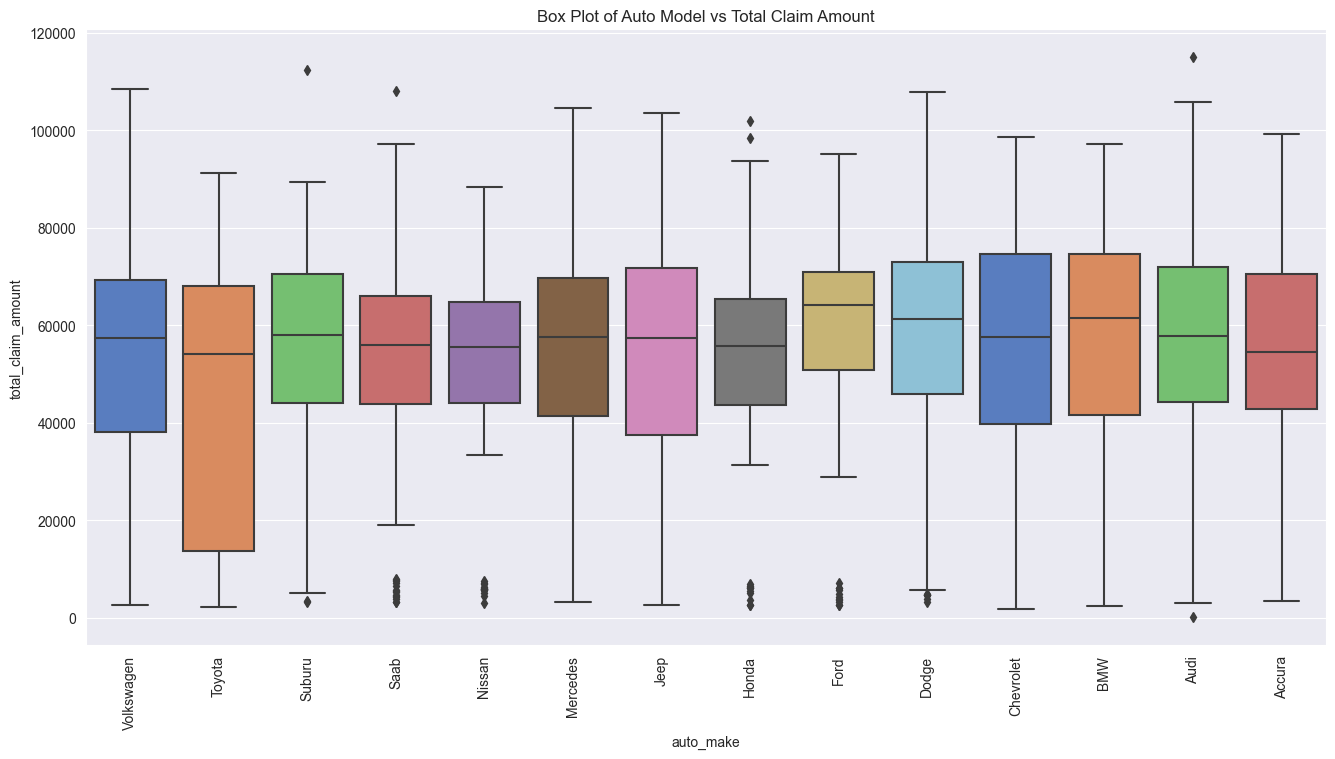

In [67]:
palette = sns.color_palette("muted")
plt.figure(figsize=(16, 8))

my_order = data.groupby(by=["auto_make"])["total_claim_amount"].median().iloc[::-1].index

sns.boxplot(x = 'auto_make', y = 'total_claim_amount' ,data = data, order = my_order,palette=palette).set(title = 'Box Plot of Auto Model vs Total Claim Amount')
plt.xticks(rotation = 90);

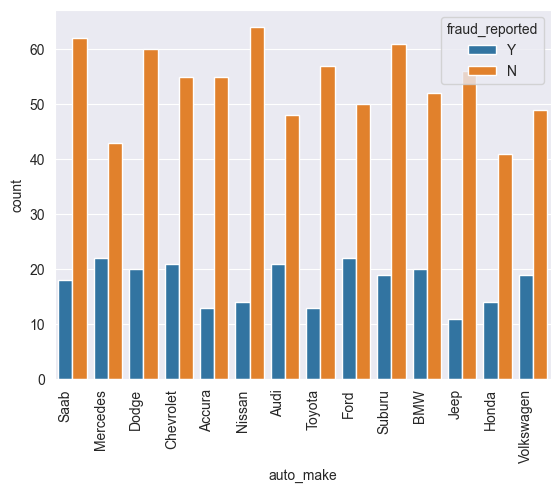

In [68]:
sns.countplot(x='auto_make',hue='fraud_reported', data=data)
ax = plt.gca()

# Xoay tiêu đề trục x
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

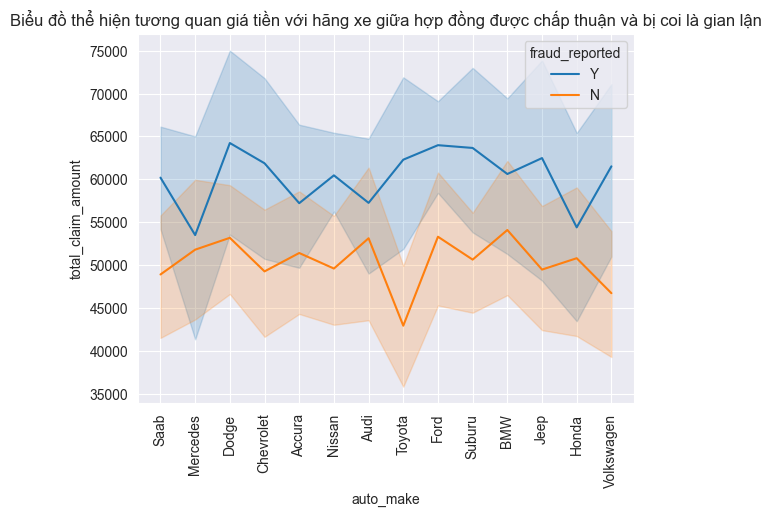

In [69]:
sns.lineplot(x='auto_make', y='total_claim_amount', hue='fraud_reported', data=data)
plt.title('Biểu đồ thể hiện tương quan giá tiền với hãng xe giữa hợp đồng được chấp thuận và bị coi là gian lận')
plt.xticks(rotation = 90)
plt.show()

### Kết luận:
- Auto_make có thể là một đặc trưng của bộ dữ liệu. Ở biểu đồ boxplot, chúng ta có thể thấy, từng loại xe sẽ có sự phân bố và biến động khác nhau về khoản tiền đòi bồi thường, và hơn hết ở biểu đồ cột, chúng ta có thể thấy được số lượng xe đòi bồi thường ở mỗi hãng xe giữa hợp đồng được chấp thuận và bị coi gian lận ko đồng đều
- Auto_make có thể là một biến tốt cho dữ liệu

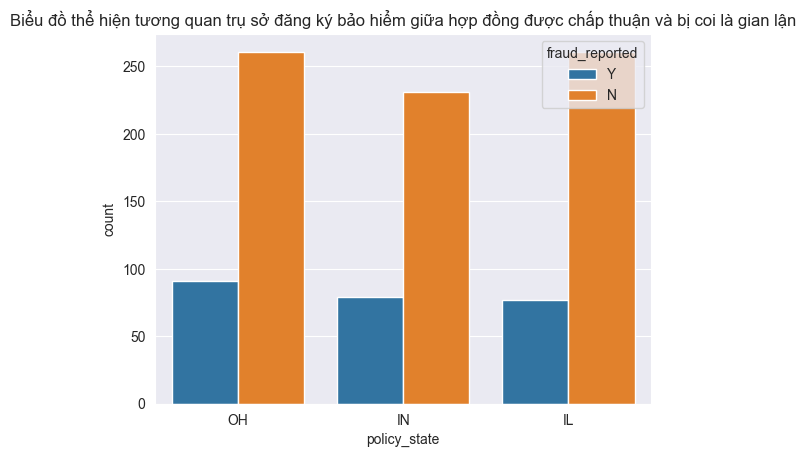

In [70]:
sns.countplot(x='policy_state',hue='fraud_reported', data=data)
plt.title('Biểu đồ thể hiện tương quan trụ sở đăng ký bảo hiểm giữa hợp đồng được chấp thuận và bị coi là gian lận')

plt.show()

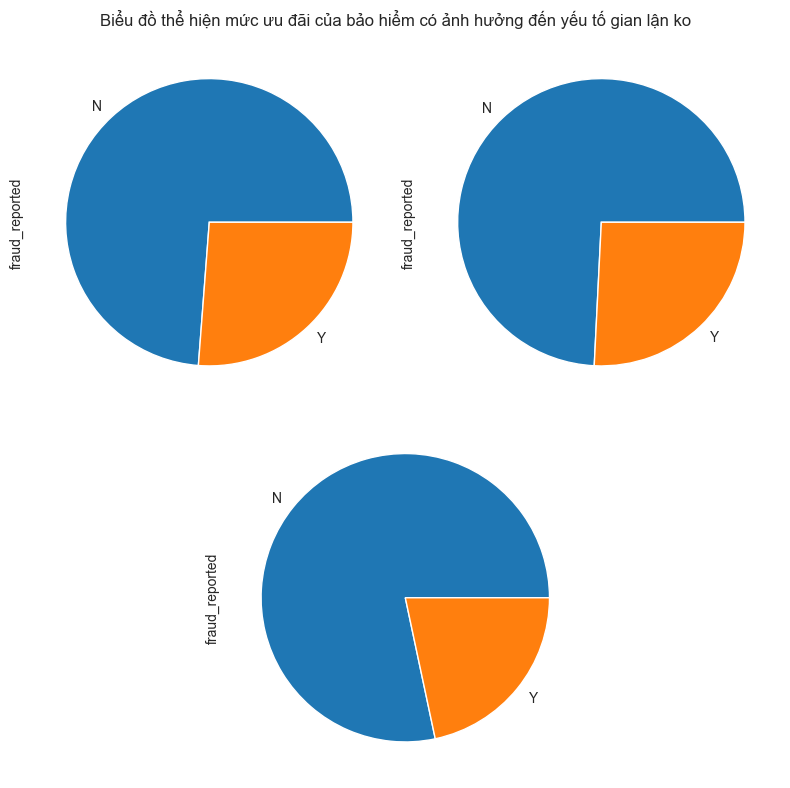

In [71]:
plt.figure(figsize=(8,8))
# Vẽ biểu đồ ở hàng 0
plt.subplot(2,2,1)
data1=data[data['policy_csl']=='250/500']
data1=data1['fraud_reported'].value_counts()
data1.plot(kind='pie')

plt.subplot(2,2,2)
data2=data[data['policy_csl']=='100/300']
data2=data2['fraud_reported'].value_counts()
data2.plot(kind='pie')

plt.subplot(2,2,(3,4))
data3=data[data['policy_csl']=='500/1000']
data3=data3['fraud_reported'].value_counts()
data3.plot(kind='pie')


# Tùy chỉnh tiêu đề
plt.suptitle("Biểu đồ thể hiện mức ưu đãi của bảo hiểm có ảnh hưởng đến yếu tố gian lận ko")
plt.tight_layout()
# Hiển thị figure
plt.show()

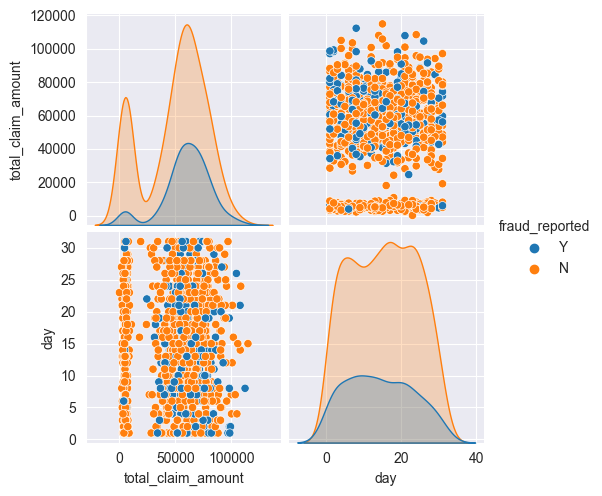

In [72]:

sns.pairplot(data=data, vars=["total_claim_amount", "day"], hue='fraud_reported' )
plt.show()

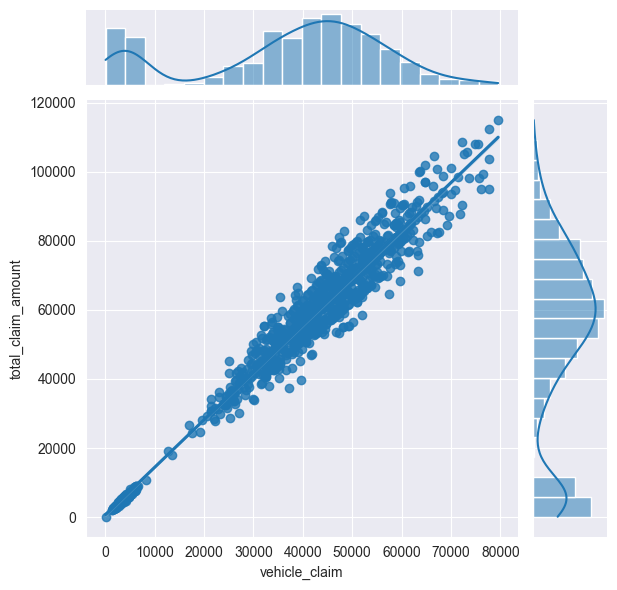

In [73]:
sns.jointplot(x='vehicle_claim', y='total_claim_amount', data=data, kind="reg")

In [74]:
data.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'day', 'month', 'year'],
      dtype='object')

In [75]:
data['policy_csl'].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

# 3. Tiền xử lí dữ liệu

In [76]:
exps_dir = "../exps"
if os.path.exists(exps_dir) == False: # tạo thư mục (nếu chưa có)
  os.makedirs(exps_dir, exist_ok=True)

save_dir = f"{exps_dir}/feature1"
os.makedirs(save_dir, exist_ok=True)
test_size=0.33
seed=42

In [77]:
test_size=0.33
seed=42
data_train, data_test = train_test_split(data, test_size = 0.33, random_state=seed)
print(data_train.shape,data_test.shape)

(670, 38) (330, 38)


In [78]:
data_train.to_excel(f'{exps_dir}/data/train.xlsx', index=None)
data_test.to_excel(f'{exps_dir}/data/test.xlsx', index=None)


In [79]:
data_train

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,day,month,year
703,Y,Middle,IL,250/500,1000,817.28,0,MALE,High School,sales,...,4630,9260,46300,Mercedes,ML350,2014,Y,3,1,2015
311,N,Young,IN,100/300,2000,765.64,0,MALE,MD,sales,...,2850,5700,22800,Honda,Accord,2001,Y,16,2,2015
722,Y,Middle,OH,100/300,2000,1422.21,0,FEMALE,Associate,handlers-cleaners,...,17180,17180,51540,Suburu,Forrestor,2005,Y,16,1,2015
629,Y,Middle,IL,100/300,2000,1133.27,0,FEMALE,High School,craft-repair,...,11000,5500,44000,Ford,F150,1999,Y,1,3,2015
0,Y,Middle,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,6510,13020,52080,Saab,92x,2004,Y,25,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Y,Old,OH,500/1000,1000,1125.37,0,FEMALE,Associate,prof-specialty,...,6650,19950,53200,Saab,95,2000,Y,13,1,2015
270,Y,Old,OH,250/500,2000,1589.54,0,MALE,College,handlers-cleaners,...,17060,8530,59710,Toyota,Highlander,2003,N,27,1,2015
860,Y,Middle,IN,100/300,1000,1023.11,0,FEMALE,MD,adm-clerical,...,10700,10700,37450,Accura,MDX,1999,N,6,2,2015
435,N,Young,OH,250/500,500,1075.41,0,MALE,MD,machine-op-inspct,...,7340,7340,58720,Dodge,Neon,1996,N,15,2,2015


In [80]:
numeric_columns=list(data_train.select_dtypes('number'))
numeric_columns

['policy_annual_premium',
 'capital-gains',
 'capital-loss',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'day',
 'month',
 'year']

In [81]:
object_columns = list(data_train.select_dtypes(['object']).columns)
data_train[object_columns]=data_train[object_columns].astype('category')
category_columns = list(data_train.select_dtypes(['category']).columns)
np.savez(f'{exps_dir}/data/columns_dtype.npz', category_columns = category_columns, numeric_columns = numeric_columns)
category_columns

['months_as_customer',
 'age',
 'policy_state',
 'policy_csl',
 'policy_deductable',
 'umbrella_limit',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'property_damage',
 'bodily_injuries',
 'witnesses',
 'police_report_available',
 'auto_make',
 'auto_model',
 'auto_year',
 'fraud_reported']

In [82]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Áp dụng hàm cho các cột chứa dữ liệu cần loại bỏ ngoại lệ
for column in outliers_list:
    data_train = remove_outliers_iqr(data_train, column)
data_train

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,day,month,year
703,Y,Middle,IL,250/500,1000,817.28,0,MALE,High School,sales,...,4630,9260,46300,Mercedes,ML350,2014,Y,3,1,2015
311,N,Young,IN,100/300,2000,765.64,0,MALE,MD,sales,...,2850,5700,22800,Honda,Accord,2001,Y,16,2,2015
722,Y,Middle,OH,100/300,2000,1422.21,0,FEMALE,Associate,handlers-cleaners,...,17180,17180,51540,Suburu,Forrestor,2005,Y,16,1,2015
629,Y,Middle,IL,100/300,2000,1133.27,0,FEMALE,High School,craft-repair,...,11000,5500,44000,Ford,F150,1999,Y,1,3,2015
0,Y,Middle,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,6510,13020,52080,Saab,92x,2004,Y,25,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Y,Old,OH,500/1000,1000,1125.37,0,FEMALE,Associate,prof-specialty,...,6650,19950,53200,Saab,95,2000,Y,13,1,2015
270,Y,Old,OH,250/500,2000,1589.54,0,MALE,College,handlers-cleaners,...,17060,8530,59710,Toyota,Highlander,2003,N,27,1,2015
860,Y,Middle,IN,100/300,1000,1023.11,0,FEMALE,MD,adm-clerical,...,10700,10700,37450,Accura,MDX,1999,N,6,2,2015
435,N,Young,OH,250/500,500,1075.41,0,MALE,MD,machine-op-inspct,...,7340,7340,58720,Dodge,Neon,1996,N,15,2,2015


In [83]:
dict(np.load(f'{exps_dir}/data/columns_dtype.npz'))

{'category_columns': array(['months_as_customer', 'age', 'policy_state', 'policy_csl',
        'policy_deductable', 'umbrella_limit', 'insured_sex',
        'insured_education_level', 'insured_occupation', 'insured_hobbies',
        'insured_relationship', 'incident_type', 'collision_type',
        'incident_severity', 'authorities_contacted', 'incident_state',
        'incident_city', 'incident_location', 'incident_hour_of_the_day',
        'number_of_vehicles_involved', 'property_damage',
        'bodily_injuries', 'witnesses', 'police_report_available',
        'auto_make', 'auto_model', 'auto_year', 'fraud_reported'],
       dtype='<U27'),
 'numeric_columns': array(['policy_annual_premium', 'capital-gains', 'capital-loss',
        'total_claim_amount', 'injury_claim', 'property_claim',
        'vehicle_claim', 'day', 'month', 'year'], dtype='<U21')}

In [84]:
(data_train=='?').sum()

months_as_customer               0
age                              0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 112
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                235
bodily_injuries                  0
witnesses                        0
police_report_available        207
total_claim_amount               0
injury_claim        

In [85]:
data_train['collision_type'].replace('?',np.nan,inplace=True)
data_train['collision_type'].fillna(method='ffill',inplace=True)
data_train[['property_damage','police_report_available']].replace('?','Unknow',inplace=True)
(data_train=='?').sum()

months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_cl

# 4.Chuẩn hóa dữ liệu

In [86]:
category_cols=list(data_train.select_dtypes('category'))
numeric_cols=list(data_train.select_dtypes('number'))
label_encoders = {}
for column in category_cols:
    label_encoder = LabelEncoder()
    data_train[column] = label_encoder.fit_transform(data_train[column])
    label_encoders[column] = label_encoder  # Lưu trữ label encoder nếu cần sau này

scaler = MinMaxScaler()
data_train[numeric_cols] = scaler.fit_transform(data_train[numeric_cols])
data_train

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,day,month,year
703,2,0,0,1,1,0.156407,0,1,2,11,...,0.215851,0.464160,0.587788,8,24,19,1,0.066667,0.0,0.0
311,0,2,1,0,2,0.116057,0,1,4,11,...,0.132867,0.285714,0.279874,6,6,6,1,0.500000,0.5,0.0
722,2,0,2,0,2,0.629083,0,0,0,5,...,0.800932,0.861153,0.656447,11,15,10,1,0.500000,0.0,0.0
629,2,0,0,0,2,0.403313,0,0,2,2,...,0.512821,0.275689,0.557652,5,14,4,1,0.000000,1.0,0.0
0,2,0,2,1,1,0.617128,0,1,4,2,...,0.303497,0.652632,0.663522,10,1,9,1,0.800000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,2,1,2,2,1,0.397140,0,0,0,9,...,0.310023,1.000000,0.678197,10,3,5,1,0.400000,0.0,0.0
270,2,1,2,1,2,0.759830,0,1,1,5,...,0.795338,0.427569,0.763496,12,18,8,0,0.866667,0.0,0.0
860,2,0,1,0,1,0.317237,0,0,4,0,...,0.498834,0.536341,0.471829,0,23,4,0,0.166667,0.5,0.0
435,0,2,2,1,0,0.358103,0,1,4,6,...,0.342191,0.367920,0.750524,4,27,1,0,0.466667,0.5,0.0


In [87]:
x_train=data_train.drop('fraud_reported',axis=1)
y_train=data_train['fraud_reported']
np.savez(f'{save_dir}/xy_training.npz', x_train = x_train, y_train = y_train)
data_train.to_excel(f'{save_dir}/df_minmax.xlsx', index=False)
x_train.to_excel(f'{save_dir}/x_train.xlsx', index=False)
y_train.to_excel(f'{save_dir}/y_train.xlsx', index=False)

In [88]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i : class_weights[i] for i in range(len(class_weights))}
class_weights_dict

{0: 0.654690618762475, 1: 2.1161290322580646}

In [89]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
print(f"+ X_train: {len(x_train)}")
for fold, (train_idx, valid_idx) in enumerate(kfold.split(x_train, y_train)):
    print(f'Fold {fold}: ')
    print(f'+ train_idx: {train_idx}')
    print(f'+ valid_idx: {valid_idx}')
    print(f'+ train / valid: {valid_idx}')
    pass

+ X_train: 656
Fold 0: 
+ train_idx: [  0   1   3   4   5   7   8   9  11  12  13  14  15  16  17  19  20  21
  22  23  25  26  27  28  29  32  33  34  35  36  37  38  40  42  43  45
  46  47  48  50  51  52  53  57  58  59  61  62  64  66  67  68  71  73
  74  75  79  80  83  84  85  87  88  89  91  92  93  94  95  96  97  98
  99 100 102 103 104 105 106 107 111 112 113 114 115 116 117 119 121 122
 123 124 125 126 127 128 129 130 134 136 137 138 139 140 141 142 143 144
 145 146 147 149 150 151 152 153 154 156 157 159 160 161 162 164 166 167
 168 169 170 171 172 173 175 176 177 178 179 180 183 184 185 186 187 188
 189 190 191 193 194 195 196 197 198 200 201 202 203 204 205 206 207 208
 209 214 216 217 219 220 222 223 224 225 226 227 228 229 230 231 232 233
 235 236 237 238 239 240 241 242 243 244 245 246 247 249 251 252 253 254
 255 257 258 259 261 262 263 266 267 268 269 270 272 273 276 277 279 280
 281 282 283 285 287 288 291 292 293 294 295 297 298 299 301 302 303 304
 306 307 308 3

In [90]:
object_cols_test=dict(np.load(f'{exps_dir}/data/columns_dtype.npz'))['category_columns']
numeric_cols_test=dict(np.load(f'{exps_dir}/data/columns_dtype.npz'))['numeric_columns']
for column in outliers_list:
    data_test = remove_outliers_iqr(data_test, column)
data_test['collision_type'].replace('?',np.nan,inplace=True)
data_test['collision_type'].fillna(method='ffill',inplace=True)
data_test[['property_damage','police_report_available']].replace('?','Unknow',inplace=True)
(data_test=='?').sum()
label_encoders = {}
for column in object_cols_test:
    label_encoder = LabelEncoder()
    data_test[column] = label_encoder.fit_transform(data_test[column])
    label_encoders[column] = label_encoder  # Lưu trữ label encoder nếu cần sau này

scaler = MinMaxScaler()
data_test[numeric_cols_test] = scaler.fit_transform(data_test[numeric_cols_test])

x_test=data_test.drop('fraud_reported',axis=1)
y_test=data_test['fraud_reported']
data_test.to_excel(f'{save_dir}/df_test_minmax.xlsx', index=False)
x_test.to_excel(f'{save_dir}/x_test.xlsx', index=False)
y_test.to_excel(f'{save_dir}/y_test.xlsx', index=False)

# 5. Xây dựng và đánh giá mô hình học sâu Neutual Network

In [91]:
X_train_unsupervised=pd.read_excel(f'{save_dir}/x_train.xlsx')
Y_train_unsupervised=pd.read_excel(f'{save_dir}/y_train.xlsx')
X_test_unsupervised=pd.read_excel(f'{save_dir}/x_test.xlsx')
Y_test_unsupervised=pd.read_excel(f'{save_dir}/y_test.xlsx')


In [92]:
model = Sequential()

model.add(Dense(units=240,activation='relu'))
Dropout(0.5)
model.add(Dense(units=120,activation='relu'))
Dropout(0.5)
model.add(Dense(units=60,activation='relu'))
Dropout(0.5)
model.add(Dense(units=30,activation='relu'))
Dropout(0.5)
model.add(Dense(units=15,activation='relu'))
Dropout(0.5)


model.add(Dense(units=1,activation='sigmoid'))
Dropout(0.5)

# For a binary classification problem

model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [93]:

earlystopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)
early_stopping = EarlyStopping(monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=0.00001,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]
checkpointer = ModelCheckpoint(filepath = "Emotion_weights.hdf5", verbose = 1, save_best_only=True)

model.fit(x=X_train_unsupervised,y=Y_train_unsupervised,
          validation_data=(X_test_unsupervised,Y_test_unsupervised),class_weight=class_weights_dict ,
          batch_size=128,epochs=600,callbacks=[checkpointer, earlystopping])



Epoch 1/600
1/6 [====>.........................] - ETA: 4s - loss: 3.6371 - accuracy: 0.8203
Epoch 1: val_loss improved from inf to 1.61015, saving model to Emotion_weights.hdf5
6/6 [==============================] - 4s 550ms/step - loss: 1.9577 - accuracy: 0.5823 - val_loss: 1.6101 - val_accuracy: 0.2716
Epoch 2/600
1/6 [====>.........................] - ETA: 0s - loss: 1.5168 - accuracy: 0.2656
Epoch 2: val_loss improved from 1.61015 to 0.93670, saving model to Emotion_weights.hdf5
6/6 [==============================] - 0s 54ms/step - loss: 1.1590 - accuracy: 0.5381 - val_loss: 0.9367 - val_accuracy: 0.2870
Epoch 3/600
1/6 [====>.........................] - ETA: 0s - loss: 0.7962 - accuracy: 0.2656
Epoch 3: val_loss improved from 0.93670 to 0.91669, saving model to Emotion_weights.hdf5
6/6 [==============================] - 0s 55ms/step - loss: 0.7741 - accuracy: 0.4909 - val_loss: 0.9167 - val_accuracy: 0.2901
Epoch 4/600
1/6 [====>.........................] - ETA: 0s - loss: 0.7992

<Axes: >

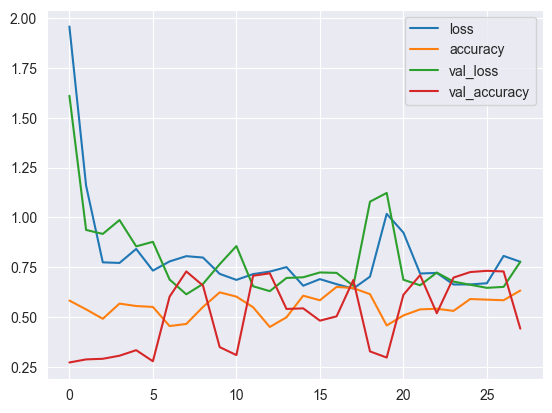

In [94]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [95]:
probabilities = model.predict(X_test_unsupervised)
predictions = np.argmax(probabilities, axis=-1)
model.evaluate(X_test_unsupervised,Y_test_unsupervised)

11/11 [==============================] - 0s 1ms/step - loss: 0.7768 - accuracy: 0.4414


[0.7768070697784424, 0.4413580298423767]

In [96]:
model.evaluate(X_test_unsupervised,Y_test_unsupervised)
print(classification_report(Y_test_unsupervised,predictions))
print(confusion_matrix(Y_test_unsupervised,predictions))

11/11 [==============================] - 0s 1ms/step - loss: 0.7768 - accuracy: 0.4414
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       239
           1       0.00      0.00      0.00        85

    accuracy                           0.74       324
   macro avg       0.37      0.50      0.42       324
weighted avg       0.54      0.74      0.63       324

[[239   0]
 [ 85   0]]


### Kết luận:
- Nhóm xây dựng một mạng Netual network ứng dụng kỹ thuật trong học sâu như callbacks, đánh trọng số,.... Nhưng không khắc phục được tình trạng (imbalanced variable).

# 6. Đánh giá và lựa chọn mô hình học máy có giám sát

In [97]:
def modelcheck_info(model,name):
    print(name)
    try:
        coefficients = model.coef_.flatten()
    except:
        coefficients = model.feature_importances_.flatten()
    feature_importance = pd.DataFrame({
        'Feature': x_train.columns,
        'Coefficient': coefficients
    })

    print('bi loai bo',feature_importance[feature_importance['Coefficient'] == 0])
    feature_importance = feature_importance[feature_importance['Coefficient'] != 0]
    feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
    feature_importance.sort_values(by='Absolute Coefficient', ascending=False, inplace=True)

    print("Xếp hạng các đặc trưng theo mức độ quan trọng:")
    print(feature_importance[['Feature', 'Coefficient']])

In [98]:
def feature_selection_inRFE(model,name):
    print("RFE")
    print(f"Kiểm tra mô hình {name}")
    rfe=RFE(estimator=model, n_features_to_select=10)
    fit=rfe.fit(x_train, y_train)
#     print("Num Features: %d"% fit.n_features_)
#     print("Selected Features: %s" % fit.support_)
#     print("Features Ranking: %s" %fit.ranking_)
#     for index, value in enumerate(fit.ranking_):
#         print(f"{value}: {x_train.columns[index]}")
    sorted_columns = [x for _, x in sorted(zip(fit.ranking_, x_train.columns))]
    sort=sorted(fit.ranking_)
#     for i,j in zip(sort,sorted_columns):
#         print("Columns sorted by RFE ranking",i,":",j)
    return [j for i,j in zip(sort,sorted_columns) if i==1]

In [99]:
models=[]
models.append(LogisticRegression())
models.append(LinearDiscriminantAnalysis())
models.append(DecisionTreeClassifier())
names=['Logistic Regression','Linear Discriminant Analysis','Decision Tree Classifer']
for model,name in zip(models,names):
    check = model.fit(x_train, y_train)
    selector = SelectFromModel(check, prefit=True)

    selected_features = x_train.columns[(selector.get_support())]
    modelcheck_info(model,name)
    print("Các đặc trưng được chọn:")
    print(selected_features)
    

Logistic Regression
bi loai bo    Feature  Coefficient
36    year          0.0
Xếp hạng các đặc trưng theo mức độ quan trọng:
                        Feature  Coefficient
16            incident_severity    -1.403092
23              property_damage     0.265201
6                umbrella_limit     0.229445
7                   insured_sex     0.177857
1                           age     0.175660
2                  policy_state     0.140496
3                    policy_csl    -0.122643
15               collision_type    -0.102118
29               property_claim     0.101495
19                incident_city    -0.100348
34                          day    -0.099978
22  number_of_vehicles_involved    -0.099079
30                vehicle_claim     0.095985
27           total_claim_amount     0.089530
0            months_as_customer    -0.080881
21     incident_hour_of_the_day     0.078854
17        authorities_contacted     0.076380
26      police_report_available    -0.075851
24              bod

In [100]:
models=[]
models.append(LogisticRegression())
models.append(LinearDiscriminantAnalysis())
models.append(DecisionTreeClassifier())
models.append(RandomForestClassifier())


names=['Logistic Regression','Linear Discriminant Analysis','Decision Tree Classifer','Random Forest']
for model,name in zip(models,names):
    model.fit(x_train,y_train)
    print(feature_selection_inRFE(model,name))
    

RFE
Kiểm tra mô hình Logistic Regression
['day', 'incident_severity', 'injury_claim', 'insured_sex', 'month', 'property_claim', 'property_damage', 'total_claim_amount', 'umbrella_limit', 'vehicle_claim']
RFE
Kiểm tra mô hình Linear Discriminant Analysis
['capital-gains', 'day', 'incident_severity', 'injury_claim', 'insured_sex', 'month', 'property_claim', 'property_damage', 'umbrella_limit', 'vehicle_claim']
RFE
Kiểm tra mô hình Decision Tree Classifer
['auto_model', 'auto_year', 'capital-loss', 'day', 'incident_location', 'incident_severity', 'insured_hobbies', 'policy_annual_premium', 'property_claim', 'total_claim_amount']
RFE
Kiểm tra mô hình Random Forest
['auto_model', 'auto_year', 'incident_location', 'incident_severity', 'injury_claim', 'insured_hobbies', 'policy_annual_premium', 'property_claim', 'total_claim_amount', 'vehicle_claim']


In [101]:
special_models=[KNeighborsClassifier(),GaussianNB(),MLPClassifier(),GradientBoostingClassifier(),MultinomialNB(),SVC(class_weight=class_weights_dict)]
names=['K Neighbors Classifier','Gau','Netual Network','Boosting','Naive','SVC']
def feature_selection_inKBest(model, name):
    print(f'Lua chon dac trung {name}')
    k_best = SelectKBest(score_func=f_classif, k=11)
    fit = k_best.fit(x_train, y_train)
    selected_features = fit.get_support()
    selected_column_names = x_train.columns[selected_features]
    return selected_column_names

for model,name in zip(special_models,names):
    print(feature_selection_inKBest(model, name))

Lua chon dac trung K Neighbors Classifier
Index(['age', 'policy_state', 'umbrella_limit', 'insured_sex',
       'incident_severity', 'incident_city', 'property_damage',
       'total_claim_amount', 'property_claim', 'vehicle_claim', 'day'],
      dtype='object')
Lua chon dac trung Gau
Index(['age', 'policy_state', 'umbrella_limit', 'insured_sex',
       'incident_severity', 'incident_city', 'property_damage',
       'total_claim_amount', 'property_claim', 'vehicle_claim', 'day'],
      dtype='object')
Lua chon dac trung Netual Network
Index(['age', 'policy_state', 'umbrella_limit', 'insured_sex',
       'incident_severity', 'incident_city', 'property_damage',
       'total_claim_amount', 'property_claim', 'vehicle_claim', 'day'],
      dtype='object')
Lua chon dac trung Boosting
Index(['age', 'policy_state', 'umbrella_limit', 'insured_sex',
       'incident_severity', 'incident_city', 'property_damage',
       'total_claim_amount', 'property_claim', 'vehicle_claim', 'day'],
      dtype

In [102]:
def check_model(name,model,X,Y,names,results,scoring):
    kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
    cv_results=cross_val_score(model,X,Y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg=scoring.title()+" %s: %.3f%% (%.3f%%)"%(name,cv_results.mean()*100,cv_results.std()*100)
    print(msg)       
    return 

Accuracy LR: 73.333% (4.657%)
Accuracy LDA: 81.250% (2.292%)
Accuracy CART: 81.861% (1.541%)
Accuracy RD: 78.812% (2.822%)
Accuracy KNN: 76.365% (3.097%)
Accuracy NB: 76.986% (1.633%)
Accuracy SVM: 76.833% (2.399%)
Accuracy NN: 80.487% (2.089%)
Accuracy GD: 78.655% (2.081%)
Accuracy Naive: 74.839% (5.231%)


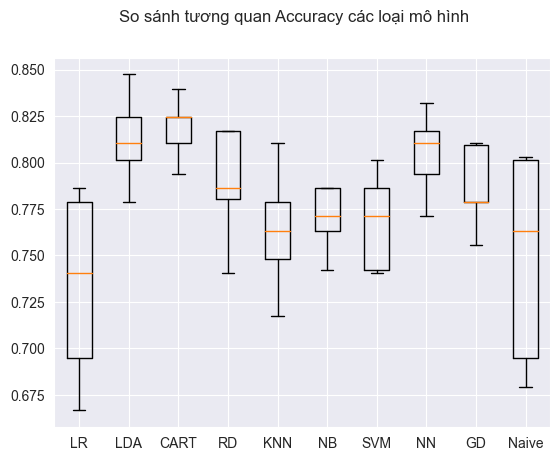

Precision LR: 46.341% (9.491%)
Precision LDA: 65.845% (8.438%)
Precision CART: 57.498% (5.098%)
Precision RD: 60.810% (10.613%)
Precision KNN: 0.000% (0.000%)
Precision NB: 51.183% (7.196%)
Precision SVM: 50.180% (8.065%)
Precision NN: 58.960% (5.342%)
Precision GD: 56.251% (6.074%)
Precision Naive: 46.703% (16.466%)


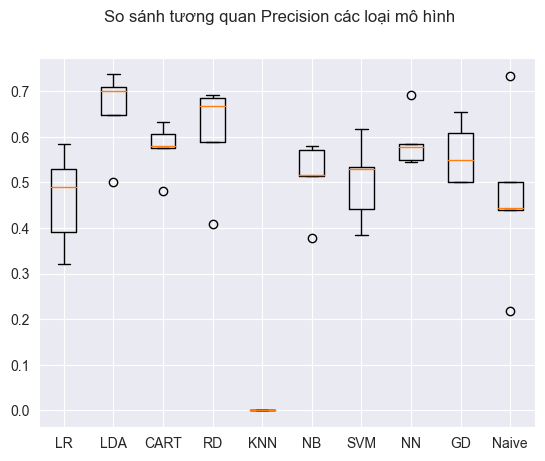

Recall LR: 74.454% (5.721%)
Recall LDA: 43.423% (6.060%)
Recall CART: 60.539% (6.152%)
Recall RD: 33.260% (5.202%)
Recall KNN: 0.000% (0.000%)
Recall NB: 57.949% (3.749%)
Recall SVM: 71.375% (7.425%)
Recall NN: 47.521% (3.295%)
Recall GD: 37.464% (7.745%)
Recall Naive: 23.777% (6.803%)


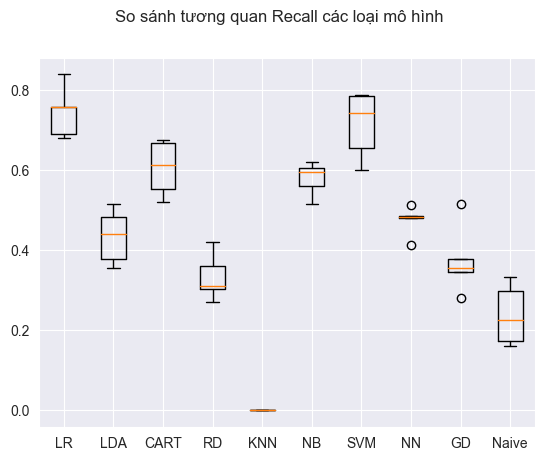

F1 LR: 56.799% (8.694%)
F1 LDA: 51.949% (5.863%)
F1 CART: 59.719% (6.226%)
F1 RD: 42.372% (5.263%)
F1 KNN: 0.000% (0.000%)
F1 NB: 54.103% (5.174%)
F1 SVM: 58.855% (7.951%)
F1 NN: 55.580% (3.760%)
F1 GD: 44.829% (7.293%)
F1 Naive: 31.038% (9.322%)


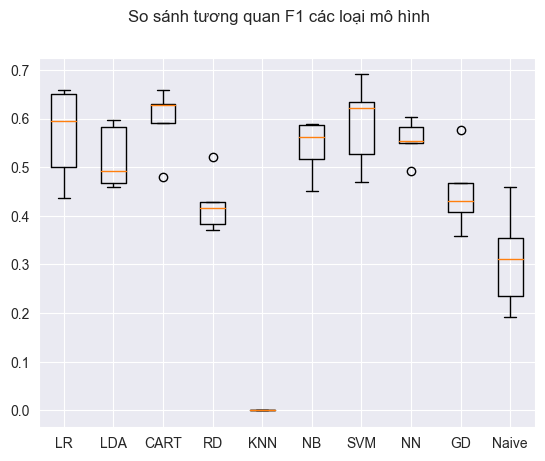

In [103]:

X=x_train
X_logistic=x_train[['insured_hobbies', 'incident_severity', 'incident_city', 'auto_make',
       'auto_model']]
X_linear=x_train[['policy_csl', 'umbrella_limit', 'insured_sex', 'incident_severity',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'injury_claim', 'vehicle_claim', 'day']]
X_decision=x_train[['policy_annual_premium', 'insured_hobbies', 'incident_severity',
       'incident_location', 'property_claim', 'auto_make']]
X_forest=x_train[['auto_model', 'day', 'incident_location', 'incident_severity',
'injury_claim', 'insured_hobbies', 'policy_annual_premium', 'property_claim', 'total_claim_amount', 'vehicle_claim']]
Y=y_train
num_folds=5
seed=7
models=[]

models.append(('KNN',KNeighborsClassifier(n_neighbors=100)))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(class_weight=class_weights_dict)))
models.append(('NN',MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)))
models.append(('GD',GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)))
models.append(('Naive',MultinomialNB()))


RandomForestClassifier(n_estimators=500, 
                                max_depth=10, 
                                min_samples_split=400, 
                                random_state=12, 
                                class_weight=class_weights_dict,
                                )

results=[]
names=[]
scorings=['accuracy','precision','recall','f1']
#check_model('LR',LogisticRegression(class_weight=class_weights_dict),X_logistic,Y,names,results,scorings)
#check_model('LDA',LinearDiscriminantAnalysis(),X_linear,Y,names,results,scorings)
#check_model('CART',DecisionTreeClassifier(class_weight=class_weights_dict),X_decision,Y,names,results,scorings)
#check_model('RD',RandomForestClassifier(n_estimators=100, random_state=42,class_weight=class_weights_dict),X_forest,Y,names,results,scorings)



for scoring in scorings:
    check_model('LR',LogisticRegression(class_weight=class_weights_dict),X_logistic,Y,names,results,scoring)
    check_model('LDA',LinearDiscriminantAnalysis(),X_linear,Y,names,results,scoring)
    check_model('CART',DecisionTreeClassifier(class_weight=class_weights_dict),X_decision,Y,names,results,scoring)
    check_model('RD',RandomForestClassifier(n_estimators=100, random_state=42,class_weight=class_weights_dict),X_forest,Y,names,results,scoring)
    for name,model in models:
        kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
        cv_results=cross_val_score(model,x_train[['age', 'policy_state', 'umbrella_limit', 'insured_sex',
       'incident_severity', 'incident_city', 'property_damage',
       'total_claim_amount', 'property_claim', 'vehicle_claim', 'day']],Y,cv=kfold,scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg=scoring.title()+" %s: %.3f%% (%.3f%%)"%(name,cv_results.mean()*100,cv_results.std()*100)
        print(msg)
    fig=plt.figure()
    fig.suptitle(f'So sánh tương quan {scoring.title()} các loại mô hình')
    ax=fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()
    results=[]
    names=[]


In [104]:
evaluate_result={}

### LogisticRegression

In [105]:
supervied_features=x_train[['insured_hobbies', 'incident_severity', 'incident_city', 'auto_make',
       'auto_model']]
supervied_target=y_train
model=LogisticRegression(class_weight=class_weights_dict)
model.fit(supervied_features,supervied_target)

LogisticRegression(class_weight={0: 0.654690618762475, 1: 2.1161290322580646})

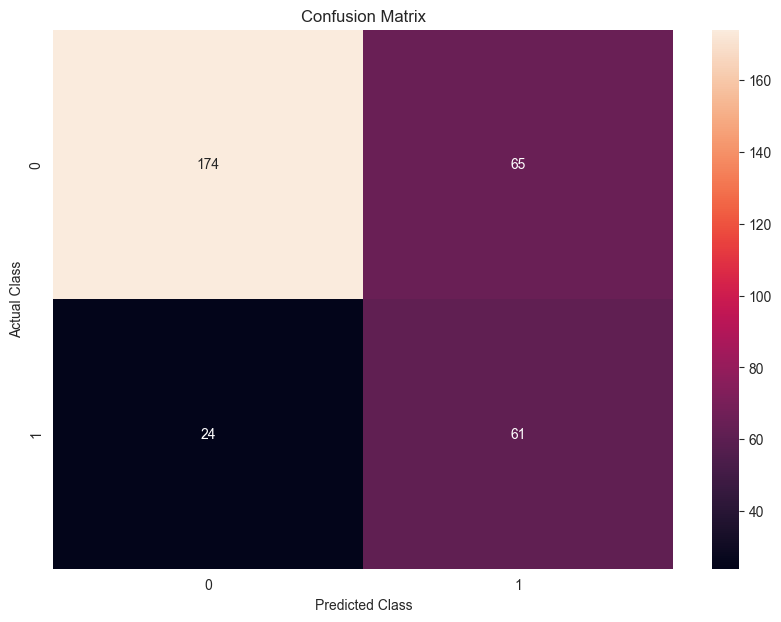

              precision    recall  f1-score   support

           0       0.88      0.73      0.80       239
           1       0.48      0.72      0.58        85

    accuracy                           0.73       324
   macro avg       0.68      0.72      0.69       324
weighted avg       0.78      0.73      0.74       324



In [106]:
predictions = model.predict(x_test[['insured_hobbies', 'incident_severity', 'incident_city', 'auto_make',
       'auto_model']])

conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
evaluate_result['LogisticRegression']=classification_report(y_test, predictions)
print(classification_report(y_test, predictions))

### Gaussian NB

In [107]:
supervied_features=x_train[['age', 'policy_state', 'umbrella_limit', 'insured_sex',
       'incident_severity', 'incident_city', 'property_damage',
       'total_claim_amount', 'property_claim', 'vehicle_claim', 'day']]
supervied_target=y_train
model=GaussianNB()
model.fit(supervied_features,supervied_target)

GaussianNB()

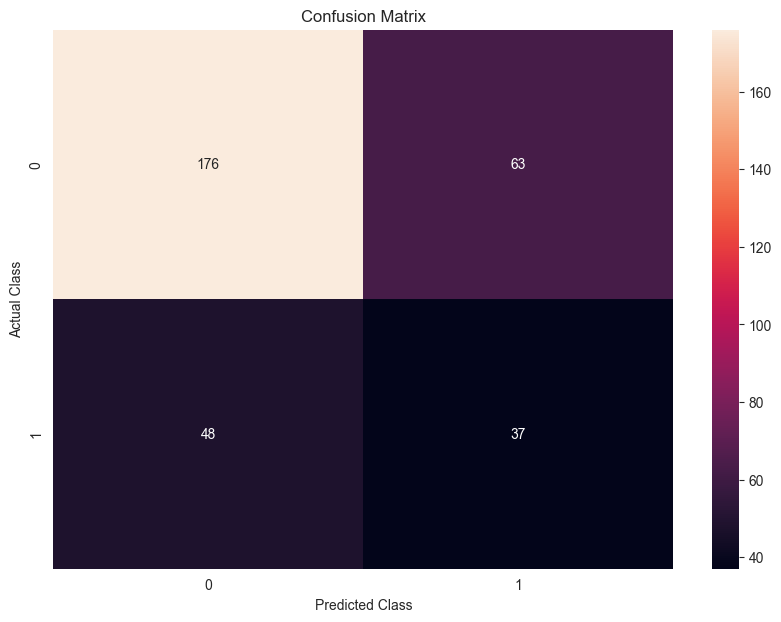

              precision    recall  f1-score   support

           0       0.79      0.74      0.76       239
           1       0.37      0.44      0.40        85

    accuracy                           0.66       324
   macro avg       0.58      0.59      0.58       324
weighted avg       0.68      0.66      0.67       324



In [108]:
predictions = model.predict(x_test[['age', 'policy_state', 'umbrella_limit', 'insured_sex',
       'incident_severity', 'incident_city', 'property_damage',
       'total_claim_amount', 'property_claim', 'vehicle_claim', 'day']])

conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
evaluate_result['GaussianNB']=classification_report(y_test, predictions)
print(classification_report(y_test, predictions))

### MultinomialNB


In [109]:
supervied_features=x_train[['age', 'policy_state', 'umbrella_limit', 'insured_sex',
       'incident_severity', 'incident_city', 'property_damage',
       'total_claim_amount', 'property_claim', 'vehicle_claim', 'day']]
supervied_target=y_train
model=MultinomialNB()
model.fit(supervied_features,supervied_target)

MultinomialNB()

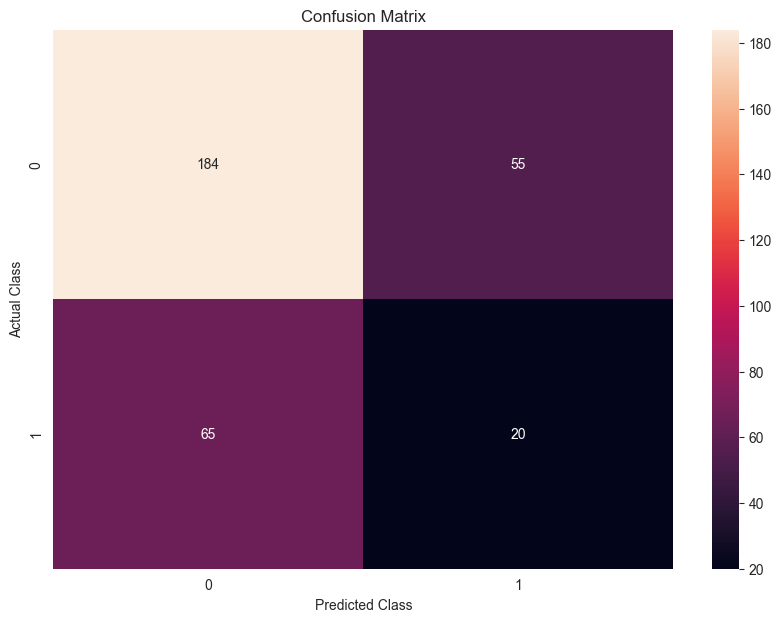

              precision    recall  f1-score   support

           0       0.74      0.77      0.75       239
           1       0.27      0.24      0.25        85

    accuracy                           0.63       324
   macro avg       0.50      0.50      0.50       324
weighted avg       0.62      0.63      0.62       324



In [110]:
predictions = model.predict(x_test[['age', 'policy_state', 'umbrella_limit', 'insured_sex',
       'incident_severity', 'incident_city', 'property_damage',
       'total_claim_amount', 'property_claim', 'vehicle_claim', 'day']])

conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
evaluate_result['MultinomialNB']=classification_report(y_test, predictions)

print(classification_report(y_test, predictions))

### MLPClassifier

In [111]:
supervied_features=x_train[['age', 'policy_state', 'umbrella_limit', 'insured_sex',
       'incident_severity', 'incident_city', 'property_damage',
       'total_claim_amount', 'property_claim', 'vehicle_claim', 'day']]
supervied_target=y_train
model=MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
model.fit(supervied_features,supervied_target)

MLPClassifier(max_iter=500)

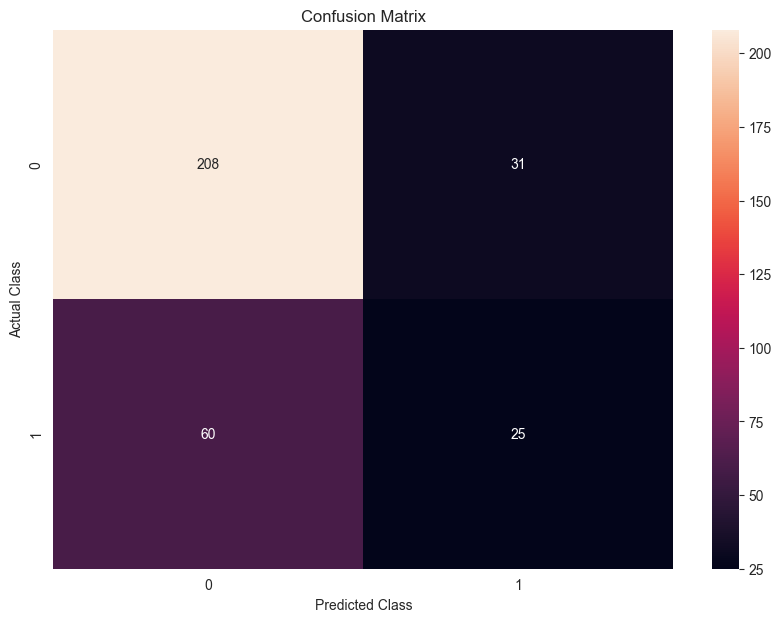

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       239
           1       0.45      0.29      0.35        85

    accuracy                           0.72       324
   macro avg       0.61      0.58      0.59       324
weighted avg       0.69      0.72      0.70       324



In [112]:
predictions = model.predict(x_test[['age', 'policy_state', 'umbrella_limit', 'insured_sex',
       'incident_severity', 'incident_city', 'property_damage',
       'total_claim_amount', 'property_claim', 'vehicle_claim', 'day']])

conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
evaluate_result['MLPClassifier']=classification_report(y_test, predictions)

print(classification_report(y_test, predictions))

### GradientBoostingClassifier

In [113]:
supervied_features=x_train[['age', 'policy_state', 'umbrella_limit', 'insured_sex',
       'incident_severity', 'incident_city', 'property_damage',
       'total_claim_amount', 'property_claim', 'vehicle_claim', 'day']]
supervied_target=y_train
model=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
model.fit(supervied_features,supervied_target)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=42)

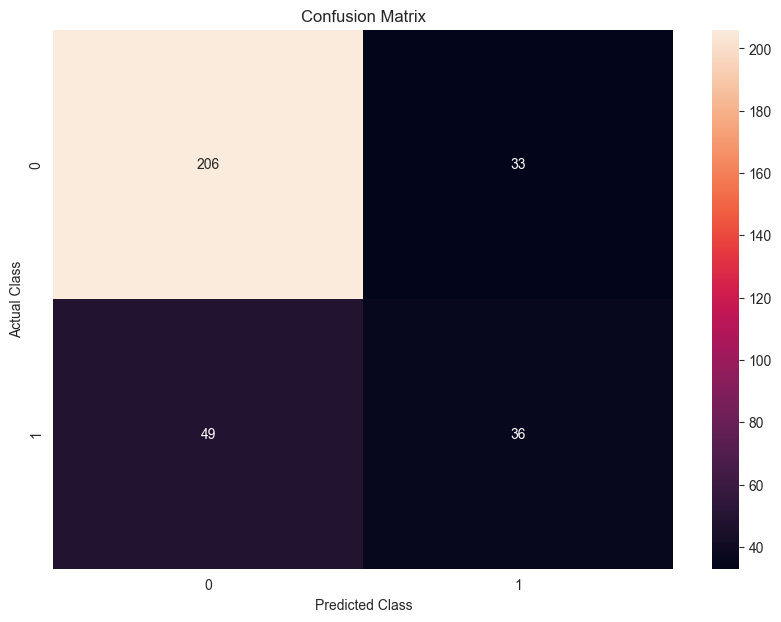

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       239
           1       0.52      0.42      0.47        85

    accuracy                           0.75       324
   macro avg       0.66      0.64      0.65       324
weighted avg       0.73      0.75      0.74       324



In [114]:
predictions = model.predict(x_test[['age', 'policy_state', 'umbrella_limit', 'insured_sex',
       'incident_severity', 'incident_city', 'property_damage',
       'total_claim_amount', 'property_claim', 'vehicle_claim', 'day']])

conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
evaluate_result['GradientBoostingClassifier']=classification_report(y_test, predictions)

print(classification_report(y_test, predictions))

### Kết luận:
- Nhìn vào đồ thị có thể thấy giá trị trung vị của mô hình Random Forest là cao nhất theo scoring="Accuracy"
- Mô hình LDA là mô hình ít bị biến động nhất và mô hình GD là một mô hình cân đối khi vừa có tỉ lệ ít biến động vừa có khoảng trung vị cao tương đối

### Mô hình SVM
      -Tỉ lệ đoán sai ở lớp bị đánh trọng số thấp cao

In [115]:
supervied_features=x_train[['age', 'policy_state', 'umbrella_limit', 'insured_sex',
       'incident_severity', 'incident_city', 'property_damage',
       'total_claim_amount', 'property_claim', 'vehicle_claim', 'day']]
supervied_target=y_train
model=SVC(class_weight=class_weights_dict)
model.fit(supervied_features,supervied_target)

SVC(class_weight={0: 0.654690618762475, 1: 2.1161290322580646})

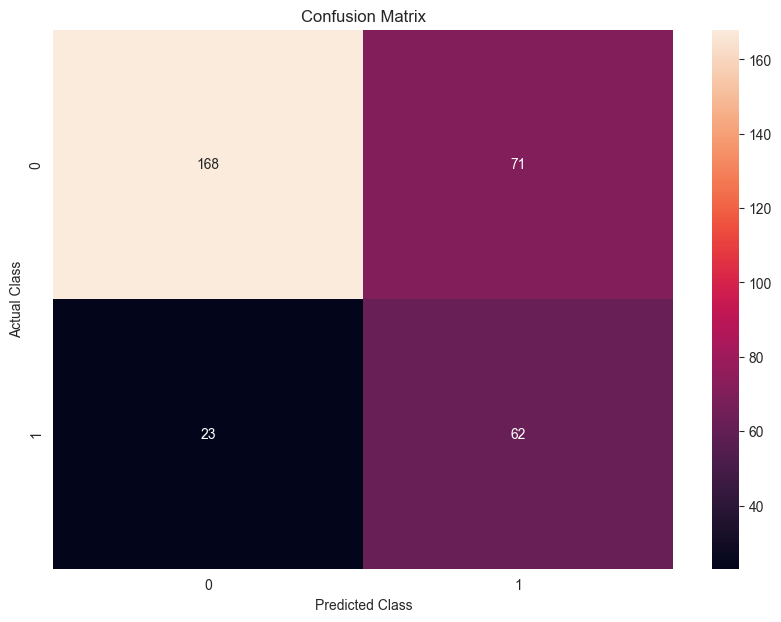

              precision    recall  f1-score   support

           0       0.88      0.70      0.78       239
           1       0.47      0.73      0.57        85

    accuracy                           0.71       324
   macro avg       0.67      0.72      0.68       324
weighted avg       0.77      0.71      0.73       324



In [116]:
predictions = model.predict(x_test[['age', 'policy_state', 'umbrella_limit', 'insured_sex',
       'incident_severity', 'incident_city', 'property_damage',
       'total_claim_amount', 'property_claim', 'vehicle_claim', 'day']])

conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
evaluate_result['SVM']=classification_report(y_test, predictions)

print(classification_report(y_test, predictions))

### Mô hình LDA
    -Có kết quả đứng thứ hai, tập test được đánh giá có kết quả khả quan

In [117]:
supervied_features=x_train[['policy_csl', 'umbrella_limit', 'insured_sex', 'incident_severity',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'injury_claim', 'vehicle_claim', 'day']]
supervied_target=y_train
model=LinearDiscriminantAnalysis()
model.fit(supervied_features,supervied_target)

LinearDiscriminantAnalysis()

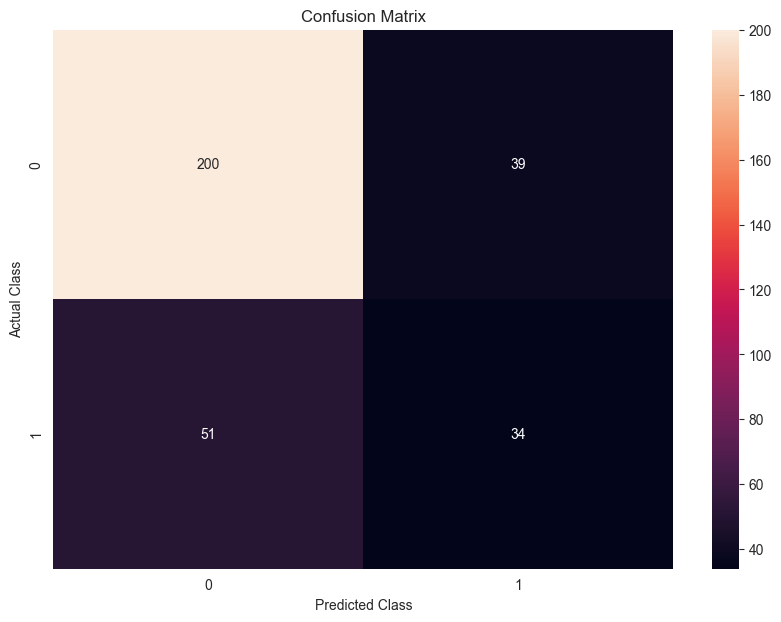

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       239
           1       0.47      0.40      0.43        85

    accuracy                           0.72       324
   macro avg       0.63      0.62      0.62       324
weighted avg       0.71      0.72      0.72       324



In [118]:
predictions = model.predict(x_test[['policy_csl', 'umbrella_limit', 'insured_sex', 'incident_severity',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'injury_claim', 'vehicle_claim', 'day']])

conf_matrix = confusion_matrix(y_test, predictions)

# Hiển thị ma trận nhầm lẫn
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
evaluate_result['LDA']=classification_report(y_test, predictions)

# Hiển thị báo cáo phân loại để xem thêm thông tin chi tiết
print(classification_report(y_test, predictions))

## 2 Mô hình đạt điểm cao nhất là:
    -RD: RandomForest
    -CART: DecisionTreeClassifer


### DecisionTreeClassifer

In [119]:
supervied_features=x_train[['policy_annual_premium', 'insured_hobbies', 'incident_severity',
       'incident_location', 'property_claim', 'auto_make']]
supervied_target=y_train
model=DecisionTreeClassifier(class_weight=class_weights_dict)
model.fit(supervied_features,supervied_target)

DecisionTreeClassifier(class_weight={0: 0.654690618762475,
                                     1: 2.1161290322580646})

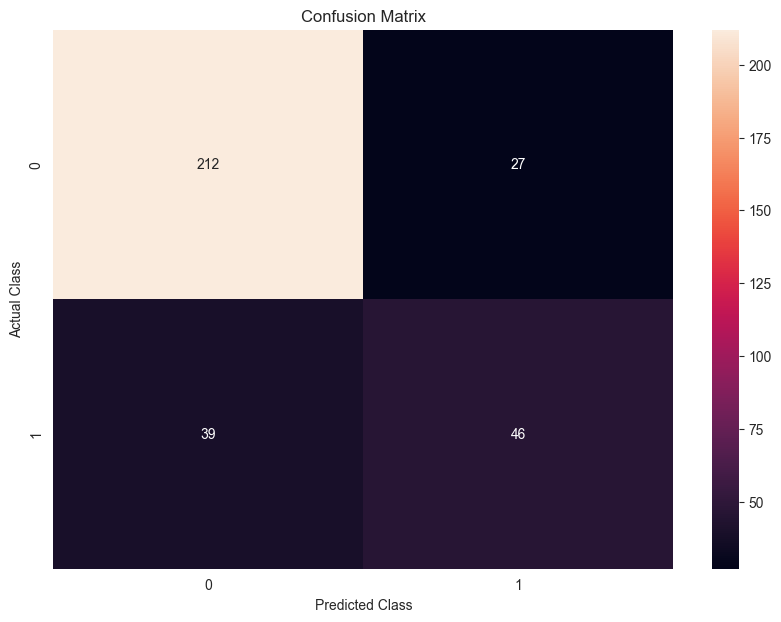

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       239
           1       0.63      0.54      0.58        85

    accuracy                           0.80       324
   macro avg       0.74      0.71      0.72       324
weighted avg       0.79      0.80      0.79       324



In [120]:
predictions = model.predict(x_test[['policy_annual_premium', 'insured_hobbies', 'incident_severity',
       'incident_location', 'property_claim', 'auto_make']])

conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
evaluate_result['DecisionTreeClassifer']=classification_report(y_test, predictions)
print(classification_report(y_test, predictions))

### Mô hình Random Forest
    - Có dấu hiệu tích cực hơn SVM

In [121]:
supervied_features=x_train[['auto_model', 'day', 'incident_location', 'incident_severity',
'injury_claim', 'insured_hobbies', 'policy_annual_premium', 'property_claim', 'total_claim_amount', 'vehicle_claim']]
supervied_target=y_train
model=RandomForestClassifier(n_estimators=100, random_state=42,class_weight=class_weights_dict)
model.fit(supervied_features,supervied_target)

RandomForestClassifier(class_weight={0: 0.654690618762475,
                                     1: 2.1161290322580646},
                       random_state=42)

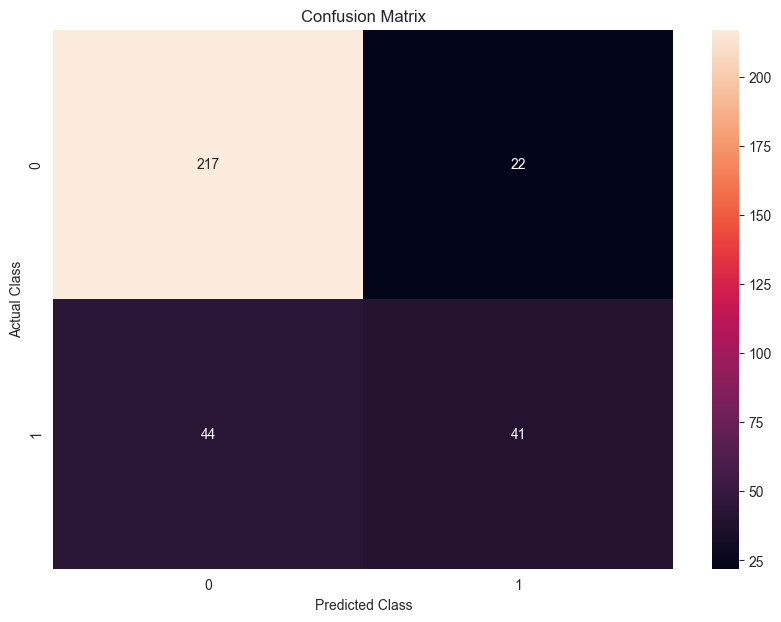

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       239
           1       0.65      0.48      0.55        85

    accuracy                           0.80       324
   macro avg       0.74      0.70      0.71       324
weighted avg       0.78      0.80      0.79       324



In [122]:
predictions = model.predict(x_test[['auto_model', 'day', 'incident_location', 'incident_severity',
'injury_claim', 'insured_hobbies', 'policy_annual_premium', 'property_claim', 'total_claim_amount', 'vehicle_claim']])

# Tạo ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, predictions)

# Hiển thị ma trận nhầm lẫn
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
evaluate_result['RD']=classification_report(y_test, predictions)

# Hiển thị báo cáo phân loại để xem thêm thông tin chi tiết
print(classification_report(y_test, predictions))

In [123]:
for x,y in evaluate_result.items():
    print(x)
    print(y)

LogisticRegression
              precision    recall  f1-score   support

           0       0.88      0.73      0.80       239
           1       0.48      0.72      0.58        85

    accuracy                           0.73       324
   macro avg       0.68      0.72      0.69       324
weighted avg       0.78      0.73      0.74       324

GaussianNB
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       239
           1       0.37      0.44      0.40        85

    accuracy                           0.66       324
   macro avg       0.58      0.59      0.58       324
weighted avg       0.68      0.66      0.67       324

MultinomialNB
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       239
           1       0.27      0.24      0.25        85

    accuracy                           0.63       324
   macro avg       0.50      0.50      0.50       324
weighted avg       0.62      0

In [124]:
def check_result(prediction):
    if prediction==1:
        return "Y"
    else:
        return "N"

In [125]:
def check_output(stt,model, X_test, Y_test):
    print(f"Lần thứ {stt}: ")
    indx = rd.randint(0, X_test.shape[0] - 1)  # Đảm bảo indx nằm trong giới hạn của DataFrame
    sample = X_test.iloc[indx, :].values        # Chuyển DataFrame thành mảng NumPy
    sample = np.expand_dims(sample, axis=0)     # Mở rộng kích thước cho phù hợp với mô hình
    y_predict = model.predict(sample)
    Y_check = check_result(Y_test.iloc[indx])
    print('True:', Y_check)
    print('Predicted:', check_result(y_predict))
    print("----------------------------")
    if Y_check==check_result(y_predict):
        return True
    else: return False
    
    

In [126]:
n_check=10
solandung=0
for i in range(n_check):
    if check_output(i+1,model, x_test[['auto_model', 'day', 'incident_location', 'incident_severity',
'injury_claim', 'insured_hobbies', 'policy_annual_premium', 'property_claim', 'total_claim_amount', 'vehicle_claim']], y_test):
        solandung+=1


Lần thứ 1: 
True: Y
Predicted: N
----------------------------
Lần thứ 2: 
True: N
Predicted: N
----------------------------
Lần thứ 3: 
True: N
Predicted: N
----------------------------
Lần thứ 4: 
True: N
Predicted: N
----------------------------
Lần thứ 5: 
True: N
Predicted: N
----------------------------
Lần thứ 6: 
True: N
Predicted: Y
----------------------------
Lần thứ 7: 
True: N
Predicted: N
----------------------------
Lần thứ 8: 
True: N
Predicted: N
----------------------------
Lần thứ 9: 
True: Y
Predicted: N
----------------------------
Lần thứ 10: 
True: N
Predicted: N
----------------------------


In [127]:
print(f"Số lần dự đoán đúng: {solandung} chiếm khoảng {(solandung/n_check)*100}% tổng lần dự đoán")

Số lần dự đoán đúng: 7 chiếm khoảng 70.0% tổng lần dự đoán


In [128]:
solandung=0
for indx in range(len(x_test)):
    sample = x_test[['auto_model', 'day', 'incident_location', 'incident_severity',
'injury_claim', 'insured_hobbies', 'policy_annual_premium', 'property_claim', 'total_claim_amount', 'vehicle_claim']].iloc[indx, :].values        # Chuyển DataFrame thành mảng NumPy
    sample = np.expand_dims(sample, axis=0)     # Mở rộng kích thước cho phù hợp với mô hình
    y_predict = model.predict(sample)
    Y_check = check_result(y_test.iloc[indx])
    print('True:', Y_check)
    print('Predicted:', check_result(y_predict))
    print("----------------------------")
    if Y_check==check_result(y_predict):
        solandung+=1
    


True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: Y
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: N
----------------------------
True: Y
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: N
----------------------------
True: Y
Predicted: Y
----------------------------
True: Y
Predicted: Y
----------------------------


True: Y
Predicted: Y
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: Y
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: Y
----------------------------
True: Y
Predicted: Y
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: Y
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------


In [129]:
print(f"Số lần dự đoán đúng trong lan kiểm tra: {solandung} chiếm khoảng {(solandung/len(x_test))*100}% tổng lần dự đoán")


Số lần dự đoán đúng trong lan kiểm tra: 258 chiếm khoảng 79.62962962962963% tổng lần dự đoán
